# Bayesian apporach to determining probability asymmetries

T2K and NOvA (and not forgetting MINOS) have measured the processes of muon-neutrinos changing into electron-neutrinos. The experiments have also measured the equivalent process using muon-antineutrinos changing into electron-antineutrinos. We would like to present a model-independent measure of the asymmetry betweeen these two processes.

## Some nomenclature
Let's suppose that we expect $\lambda_{\mu}$ muon-neutrinos at the far detector, there is some probability $P_{\mu \rightarrow e}$ that these muon-neutrinos will change into electron-neutrinos. So we expect $\lambda_e = P_{\mu \rightarrow e} \lambda_{\mu}$ electron neutrinos. Each of these statements could be referring to the total number of neutrinos or the number of neutrinos in a particular energy bin (e.g. ${\lambda_e}_{i}$ would be the number of electron neutrinos we expect in the $i$th energy bin.

Now in addition to the number of signal events we expect (in each bin) there will also be some background contribution which we expect to be $\lambda_b$. So the total number of events we expect is $\lambda = \lambda_e + \lambda_b$.

Similar the total number of anti-electron neutrinos expected is $\bar{\lambda} = \bar{\lambda_e} + \bar{\lambda_b}$

We want to measure the probability of a muon-neutirno changing into an electron-neutrino (and the equivalent anti-neutrino proceess). This amounts to
$$ P=P_{\nu_\mu \rightarrow \nu_e} = \frac{\lambda_e}{\lambda_{\mu}} $$
$$ \bar{P}=P_{\bar{\nu_\mu} \rightarrow \bar{\nu_e}} = \frac{\bar{\lambda_e}}{\bar{\lambda_{\mu}}} $$

Now we can characterise the asymmetry bewteen these probabilities as:
$$\mathcal{A} = \frac{P - \bar{P}}{P+ \bar{P}}$$

However the only measurements are the number of electron-neutrinos, $n_e$ and electron-antineutrinos, $\bar{n_e}$, that we observe (ignoring the fact that our predicted number of events depends on the near detector data). Once more this statement could be true in a given energy bin.

So in order to measure the asymmetry, $\mathcal{A}$, we need to use $n_e$ and $\bar{n_e}$ to determine $\lambda_e$ and $\bar{\lambda_e}$ respectively.

### First determine $\lambda_e$

We now that in our experiment we will measure some number of electron-neutrino candidate events (in a given bin). Naturally this will follow a Poisson distribution such that $n_e = \textrm{Poisson}(\lambda_e + \lambda+b)$.

In [1]:
from math import sqrt
import matplotlib.pyplot as plt

from matplotlib.ticker import MaxNLocator
import numpy as np
import matplotlib.style
import matplotlib as mpl
import math
import scipy
import scipy.stats
from mpl_toolkits.axes_grid1 import make_axes_locatable



#Set default figure size
mpl.rcParams['figure.figsize'] = [12.0, 8.0]
mpl.rcParams["legend.frameon"] = False
mpl.rcParams.update({'font.size': 22})



### Simple Poisson example
Let's imagine a toy example where expect $\lambda_e=20$ and $\lambda_b=10$.

In [2]:
lb_true=5
le_true=5
ne= np.random.poisson(le_true+lb_true, 10000)

Text(0.5, 0, '$n_e$')

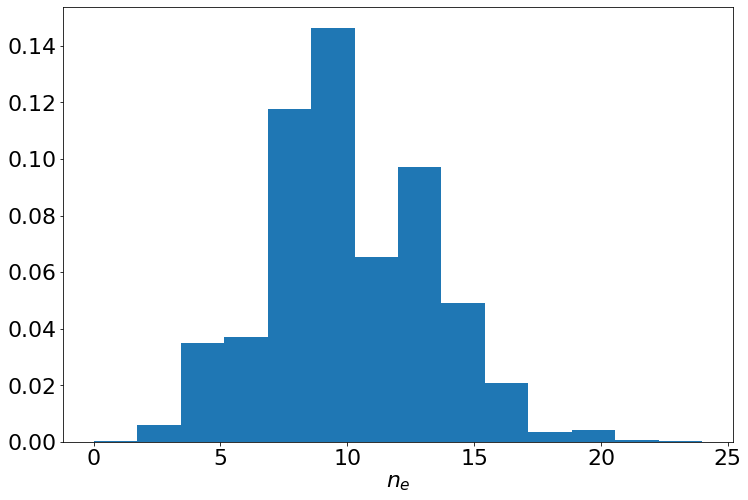

In [3]:
fig, ax = plt.subplots()
count, bins, ignored = ax.hist(ne, 14, density=True)
ax.set_xlabel("$n_e$")


### Determining $\lambda_e$

If we assume $\lambda_b$ is exactly known then we can use our data to constrain $\lambda_e$.

#### Option 1: Flat prior on $\lambda_e$
We can use a flat prior on $\lambda_e$ so that all positive values (up to some cutoff) are equally likely. 

#### Option 2: The gamma function
The gamma function is conjugate prior of the Poission. No I don't fully know what this means. But anyhow..

#### Determine the posterior
Then we can determine the likelihood by evaluating the following probability for each $l_e$ given the measured $n_e$.
$$L(l_e | n_e) = \textrm{Poisson}(n_e, \lambda = l_e + l_b)$$
remembering that we have assumed l_b is fixed.

The posterior is merely the product of the prior and the likelihood at each value of $l_e$.

In [4]:
ne[0]=6
print("Number of measured electron neutrinos",ne[0])
print("Expected background",lb_true)
print("Expected signal",le_true)
le=np.linspace(0,50,51)
leShift=le+lb_true
counts=np.arange(50)
fprior=np.full(le.shape,1./le.shape[0])
fprior=fprior/np.sum(fprior)
gprior=scipy.stats.gamma.pdf(le,a=le_true,loc=0,scale=1)
gprior=gprior/sum(gprior)
likelihood = scipy.stats.poisson.pmf(k=ne[0], mu=leShift)

fproduct=fprior*likelihood
fposterior=fproduct/sum(fproduct)
gproduct=gprior*likelihood
gposterior=gproduct/sum(gproduct)


realPMF=scipy.stats.poisson.pmf(k=counts,mu=ne[0])
print("Poisson mean:",np.sum(realPMF*counts))
print("Flat Posterior mean:",np.sum(le*fposterior))
print("Gamma Posterior mean:",np.sum(le*gposterior))
print("Flat Prior mean:",np.sum(le*fprior))
print("Gamma Prior mean:",np.sum(le*gprior))

print("Flat Posterior:  max=",le[np.argmax(fposterior)])
print("Gamma Posterior:  max=",le[np.argmax(gposterior)])

Number of measured electron neutrinos 6
Expected background 5
Expected signal 5
Poisson mean: 5.999999999999997
Flat Posterior mean: 2.6933669101771947
Gamma Posterior mean: 3.7311809329802594
Flat Prior mean: 25.0
Gamma Prior mean: 4.999215187897067
Flat Posterior:  max= 1.0
Gamma Posterior:  max= 3.0


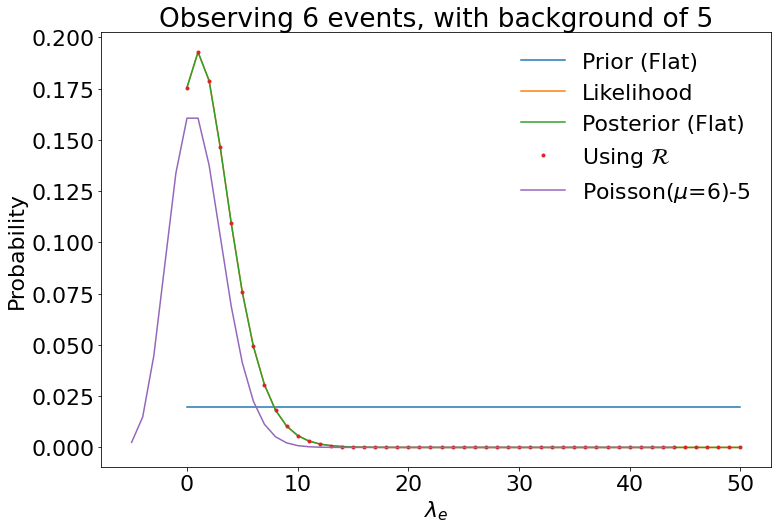

In [5]:
counts=np.arange(50)

def R(ns,nb,no):
    return np.exp(-ns) * (1 + ns/nb)**no


rArray=R(le,lb_true,ne[0])

fig, ax = plt.subplots()
#ax.plot(le,leShift)
ax.plot(le,fprior,label="Prior (Flat)")
#ax.plot(le,gprior,label="Prior (Gamma)")
ax.plot(le,likelihood/sum(likelihood),label="Likelihood")
ax.plot(le,fposterior,label="Posterior (Flat)")
ax.plot(le,rArray/sum(rArray),".",label="Using $\mathcal{R}$")
#ax.plot(le,gposterior,label="Posterior (Gamma)")
ax.plot(counts-lb_true,realPMF,label="Poisson($\mu$="+str(ne[0])+")-"+str(lb_true))
#scaledPMF=realPMF
#scaledPMF[(counts-lb_true)<0]=0
#scaledPMF/=sum(scaledPMF)
#ax.plot(counts-lb_true,scaledPMF,label="Scaled Poisson($\mu$="+str(ne[0])+")-"+str(lb_true))


ax.set_xlabel("$\lambda_e$")
ax.set_ylabel("Probability")
ax.set_title("Observing "+str(ne[0])+ " events, with background of "+str(lb_true))
ax.legend()


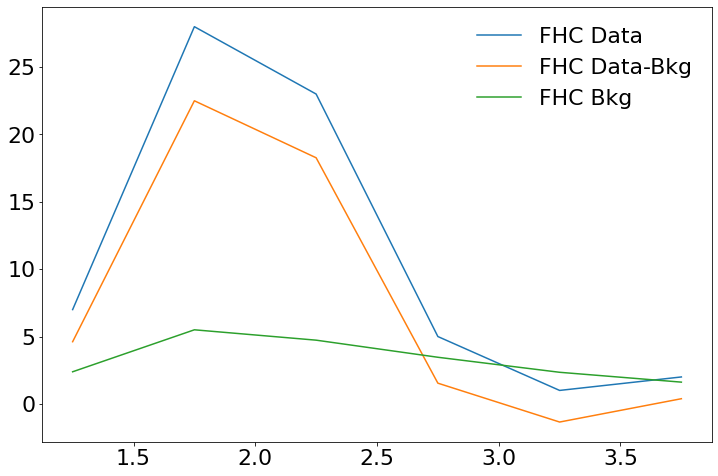

In [6]:
fhcLowCVNCount=np.array([2,7,5,1,0,1])
fhcHighCVNCount=np.array([5,21,18,4,1,1])
rhcLowCVNCount=np.array([1,5,5,1,1,0])
rhcHighCVNCount=np.array([1,8,5,3,1,0])

binCents=np.array([1.25,1.75,2.25,2.75,3.25,3.75])
fhcSignal=np.array([[1.2470588235294118, 4.615384615384617],
[1.758823529411765, 22.500000000000007],
[2.2529411764705882, 18.269230769230774],
[2.7470588235294127, 1.53846153846154],
[3.2588235294117656, -1.3461538461538467],
[3.752941176470589, 0.3846153846153868]])
rhcSignal=np.array([[1.2451923076923077, 0.7812499999999964],
[1.7427884615384617, 10.4296875],
[2.240384615384616, 7.617187499999998],
[2.745192307692308, 2.2656249999999982],
[3.2427884615384617, 0.703125],
[3.754807692307693, -0.9765625]])
fig, ax = plt.subplots()
ax.plot(binCents,fhcLowCVNCount+fhcHighCVNCount,label="FHC Data")
ax.plot(binCents,fhcSignal[:,1],label="FHC Data-Bkg")
ax.plot(binCents,(fhcLowCVNCount+fhcHighCVNCount)-fhcSignal[:,1],label="FHC Bkg")
ax.legend()


In [7]:
fhcPred=np.array([[1.2035398230088494, 88.57142857142867],
[1.7699115044247793, 471.42857142857144],
[2.247787610619469, 457.1428571428572],
[2.761061946902655, 125.71428571428578],
[3.292035398230089, 34.28571428571445],
[3.752212389380532, 17.142857142857338]])
rhcPred=np.array([
[1.251798561151079, 31.98198198198196],
[1.7410071942446042, 181.53153153153153],
[2.237410071942446, 179.27927927927928],
[2.7482014388489207, 51.351351351351326],
[3.2446043165467624, 15.315315315315303],
[3.7482014388489207, 7.207207207207205]])


Text(0, 0.5, 'Events')

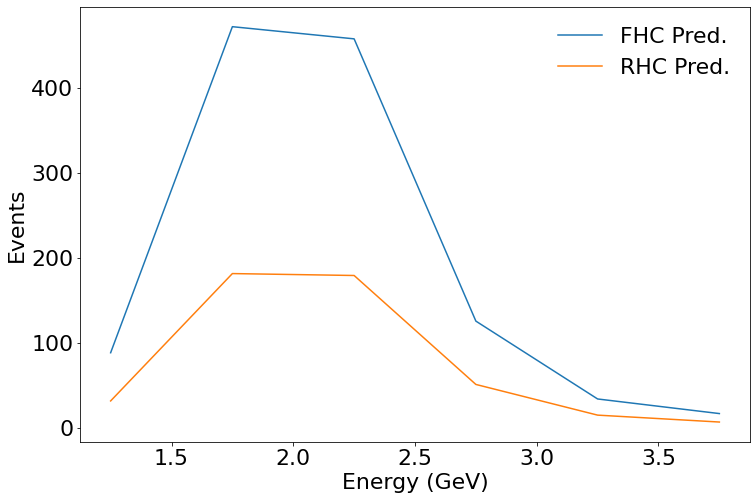

In [8]:
fig, ax = plt.subplots()
ax.plot(binCents,fhcPred[:,1],label="FHC Pred.")
ax.plot(binCents,rhcPred[:,1],label="RHC Pred.")
ax.legend()
ax.set_xlabel("Energy (GeV)")
ax.set_ylabel("Events")

In [9]:
fhcCount=fhcLowCVNCount+fhcHighCVNCount
fhcBack=(fhcLowCVNCount+fhcHighCVNCount)-fhcSignal[:,1]
rhcCount=rhcLowCVNCount+rhcHighCVNCount
rhcBack=(rhcLowCVNCount+rhcHighCVNCount)-rhcSignal[:,1]


In [10]:
print(fhcCount,fhcBack)
print(rhcCount,rhcBack)

[ 7 28 23  5  1  2] [2.38461538 5.5        4.73076923 3.46153846 2.34615385 1.61538462]
[ 2 13 10  4  2  0] [1.21875   2.5703125 2.3828125 1.734375  1.296875  0.9765625]


In [11]:
import scipy
import scipy.stats

fhcSig=fhcCount-fhcBack
rhcSig=rhcCount-rhcBack
print(fhcSig,rhcSig)


[ 4.61538462 22.5        18.26923077  1.53846154 -1.34615385  0.38461538] [ 0.78125   10.4296875  7.6171875  2.265625   0.703125  -0.9765625]


# Flat prior
First step we are going to do a grid search and assume a flat prior for the counts in a bin from 0-50

In [12]:

theta=np.linspace(0,50,501)
prior=np.full(theta.shape,1./theta.shape[0])
prior=prior/np.sum(prior)

flikelihood = scipy.stats.poisson.pmf(k=fhcCount[0], mu=theta+fhcBack[0])
fproduct=prior*flikelihood
fposterior=fproduct/sum(fproduct)

rlikelihood = scipy.stats.poisson.pmf(k=rhcCount[0], mu=theta+rhcBack[0])
rproduct=prior*rlikelihood
rposterior=rproduct/sum(rproduct)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49] 7
Poisson mean: 4.6153846153846185
Flat Posterior mean: 5.632359615349683
Flat Prior mean: 25.0


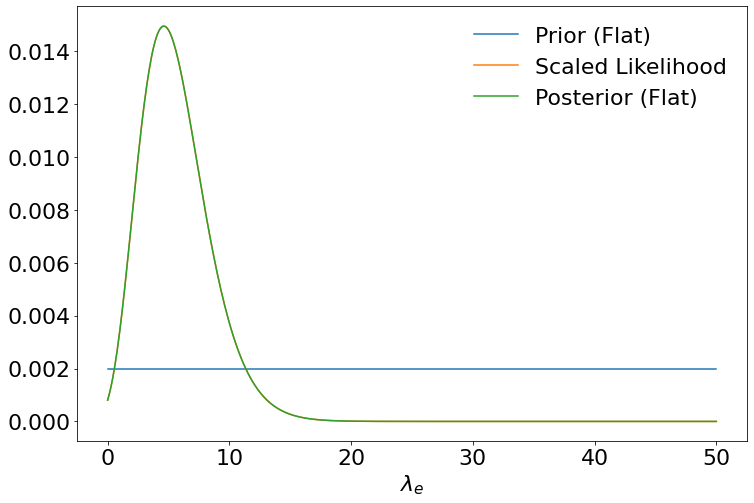

In [13]:
counts=np.arange(50)
fig, ax = plt.subplots()
ax.plot(theta,prior,label="Prior (Flat)")
ax.plot(theta,flikelihood/sum(flikelihood),label="Scaled Likelihood")
ax.plot(theta,fposterior,label="Posterior (Flat)")
print(counts,fhcCount[0])
realPMF=scipy.stats.poisson.pmf(k=counts,mu=fhcCount[0]-fhcBack[0])
print("Poisson mean:",np.sum(realPMF*counts))
print("Flat Posterior mean:",np.sum(theta*fposterior))
print("Flat Prior mean:",np.sum(theta*prior))
#ax.plot(counts,realPMF,label="Poisson $\mu$="+str(fhcCount[0]-fhcBack[0]))
ax.set_xlabel("$\lambda_e$")
ax.legend()
cdf=np.cumsum(fposterior)

In [14]:
print(theta[np.argmax(fposterior)])
print(counts[np.argmax(realPMF)])

4.6000000000000005
4


## Flat prior
As expected the maximum of the posterior matches the observed number of events (minus the background) except for the cases when $n_e - \lambda_b \leq 0$, in which case we can still use the Bayesian approach to put an upper limit on $\lambda_e$. 

1.0000000000000029
1.000000000000001
0.9999999999999973
1.0000000000000093
1.0000000000000073
1.0000000000000036


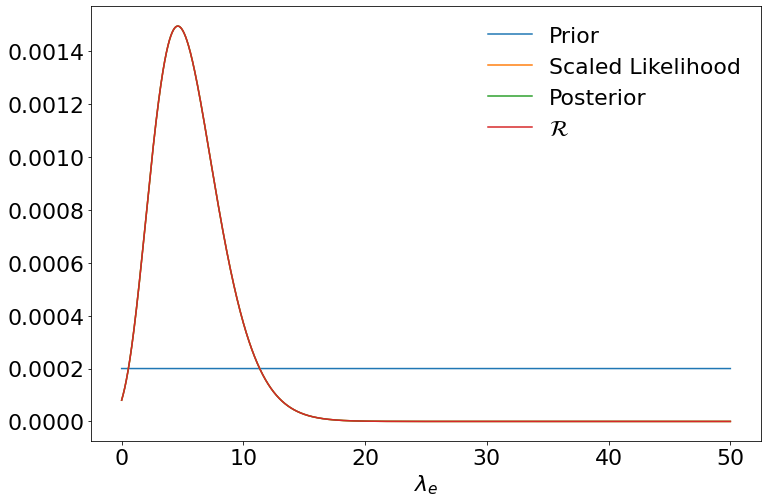

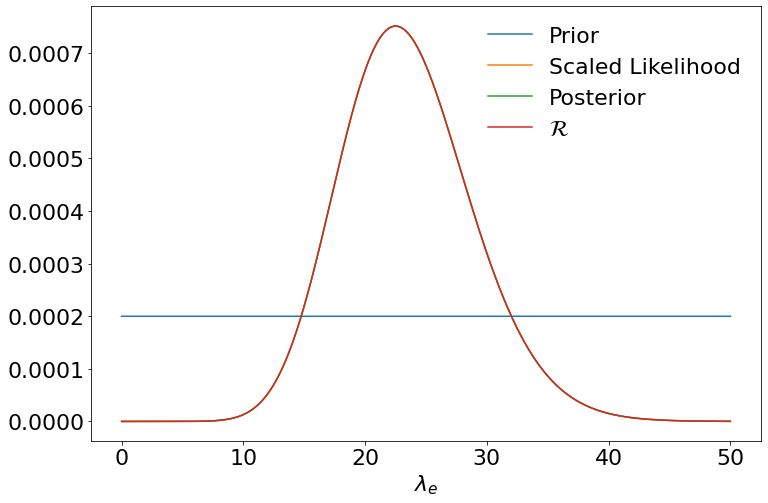

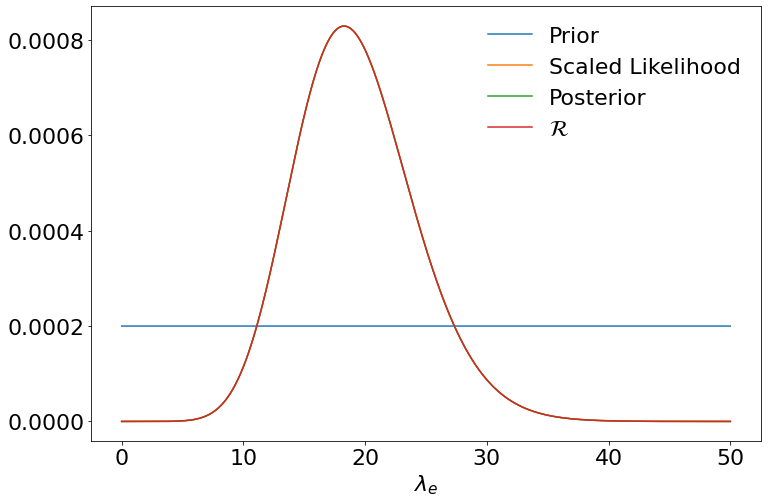

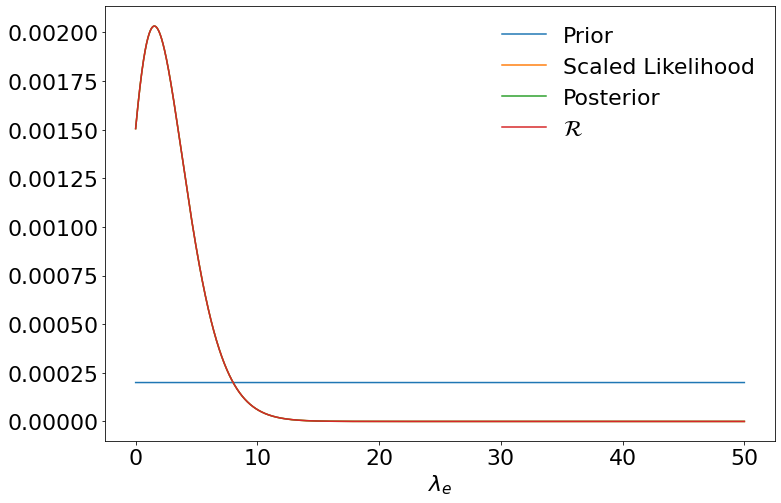

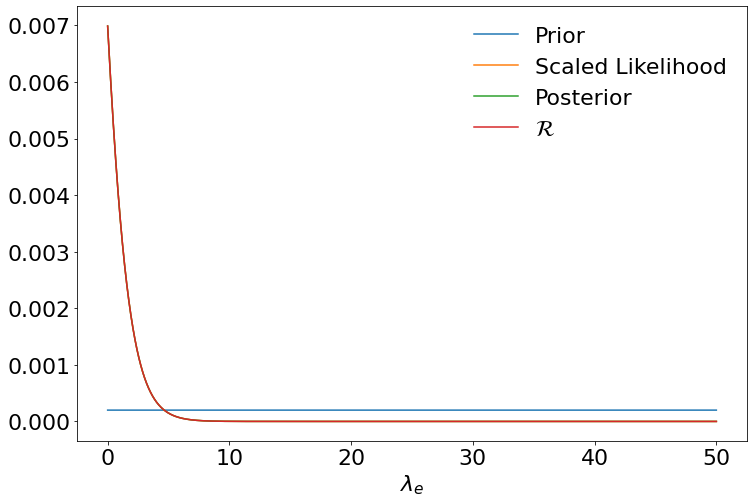

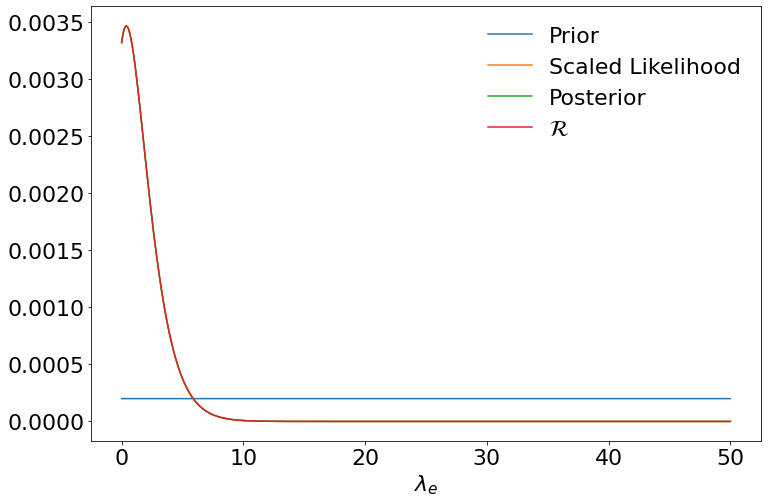

In [15]:
fhcVals=[]
rhcVals=[]
fhcPostArray=[]
rhcPostArray=[]

theta=np.linspace(0,50,5001)
prior=np.full(theta.shape,1./theta.shape[0])
prior=prior/np.sum(prior)

for bin in range(6):
    fig, ax = plt.subplots()
    
    fhcRArray=R(theta,fhcBack[bin],fhcCount[bin])
    fhcLikelihood = scipy.stats.poisson.pmf(fhcCount[bin], theta+fhcBack[bin])
    fhcProduct=prior*fhcLikelihood
    fhcPosterior=fhcProduct/sum(fhcProduct)
    print(np.sum(fhcPosterior))
    fhcPostArray.append(fhcPosterior)
    ax.plot(theta,prior,label="Prior")
    ax.plot(theta,fhcLikelihood/sum(fhcLikelihood),label="Scaled Likelihood")
    ax.plot(theta,fhcPosterior,label="Posterior")
    ax.plot(theta,fhcRArray/sum(fhcRArray),label="$\mathcal{R}$")
    ax.set_xlabel("$\lambda_e$")
    ax.legend()
    cdf=np.cumsum(fhcPosterior)
    val5=theta[np.argmax(cdf>0.05)]
    valLow=theta[np.argmax(cdf>(1-0.6828)/2)]
    if(valLow>theta[np.argmax(fhcPosterior)]):
        valLow=theta[0]
        val5=theta[0]
    if(val5>theta[np.argmax(fhcPosterior)]):
        val5=theta[0]
    
    fhcVals.append((theta[np.argmax(fhcPosterior)],valLow,theta[np.argmax(cdf>(1+0.6827)/2)],val5,theta[np.argmax(cdf>0.95)]))
    
for bin in range(6):
    rhcLikelihood = scipy.stats.poisson.pmf(rhcCount[bin], theta+rhcBack[bin])
    rhcProduct=prior*rhcLikelihood
    rhcPosterior=rhcProduct/sum(rhcProduct)
    rhcPostArray.append(rhcPosterior)
    cdf=np.cumsum(rhcPosterior)
    val5=theta[np.argmax(cdf>0.05)]
    valLow=theta[np.argmax(cdf>(1-0.6828)/2)]
    if(valLow>theta[np.argmax(rhcPosterior)]):
        valLow=theta[0]
        val5=theta[0]
    if(val5>theta[np.argmax(rhcPosterior)]):
        val5=theta[0]
    
    
    rhcVals.append((theta[np.argmax(rhcPosterior)],valLow,theta[np.argmax(cdf>(1+0.6827)/2)],val5,theta[np.argmax(cdf>0.95)]))
    
    

[[ 4.62  2.87  8.39  1.65 10.77]
 [22.5  18.14 28.85 15.25 32.89]
 [18.27 14.4  24.13 11.82 27.85]
 [ 1.54  0.9   5.21  0.31  7.3 ]
 [ 0.    0.    2.37  0.    3.74]
 [ 0.38  0.    3.39  0.    5.02]]
[ 4.61538462 22.5        18.26923077  1.53846154 -1.34615385  0.38461538]


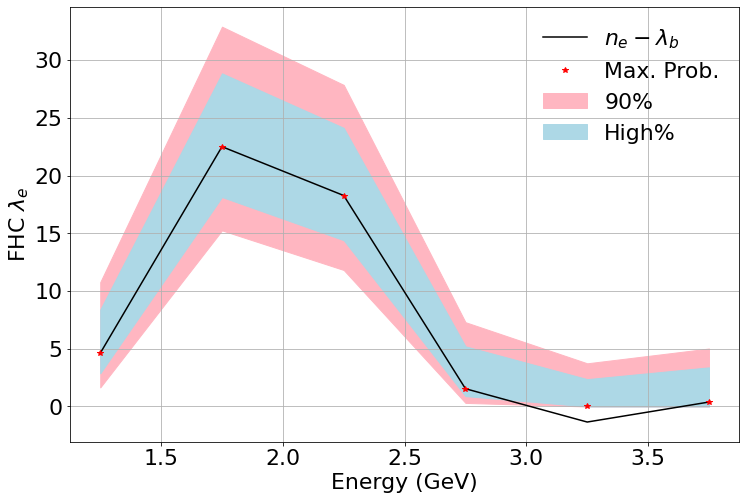

In [16]:
fig, ax = plt.subplots()
fhcVals=np.array(fhcVals)
print(fhcVals)
print(fhcSig)
ax.fill_between(binCents,fhcVals[:,3],fhcVals[:,4],label="90%",color="lightpink")
ax.fill_between(binCents,fhcVals[:,1],fhcVals[:,2],label="High%",color="lightblue")
ax.plot(binCents,fhcSig,"black",label="$n_e - \lambda_b$")
ax.plot(binCents,fhcVals[:,0],"r*",label="Max. Prob.")
ax.legend()
ax.set_xlabel("Energy (GeV)")
ax.set_ylabel("FHC $\lambda_e$")
ax.grid()

[[ 0.78  0.56  3.62  0.18  5.26]
 [10.43  7.73 15.13  5.89 18.1 ]
 [ 7.62  5.35 11.88  3.79 14.58]
 [ 2.27  1.27  5.49  0.53  7.47]
 [ 0.7   0.53  3.57  0.17  5.21]
 [ 0.    0.    1.84  0.    2.99]]
[ 0.78125   10.4296875  7.6171875  2.265625   0.703125  -0.9765625]


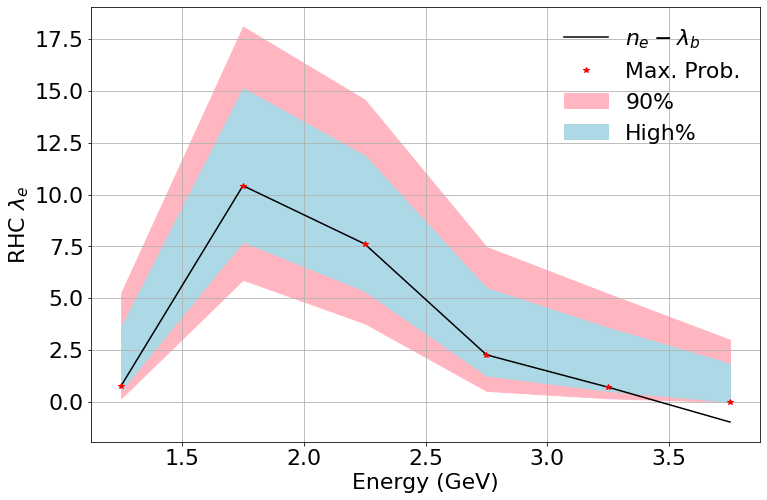

In [17]:
fig, ax = plt.subplots()
rhcVals=np.array(rhcVals)
print(rhcVals)
print(rhcSig)
ax.fill_between(binCents,rhcVals[:,3],rhcVals[:,4],label="90%",color="lightpink")
ax.fill_between(binCents,rhcVals[:,1],rhcVals[:,2],label="High%",color='lightblue')
ax.plot(binCents,rhcSig,"black",label="$n_e - \lambda_b$")
ax.plot(binCents,rhcVals[:,0],"r*",label="Max. Prob.")
ax.legend()
ax.set_xlabel("Energy (GeV)")
ax.set_ylabel("RHC $\lambda_e$")
ax.grid()

## How many times do we throw?

Is the correct process to draw a value of $\lambda_e$ from the distribution and then pick a Poisson number from $\lambda=\lambda_e + \lambda_b$ and then mess around with stats. No... can't do this as it is double counting the Poisson fluctuations.




5 3.46153846153846
1.5251115384615401 2.2307558758187773


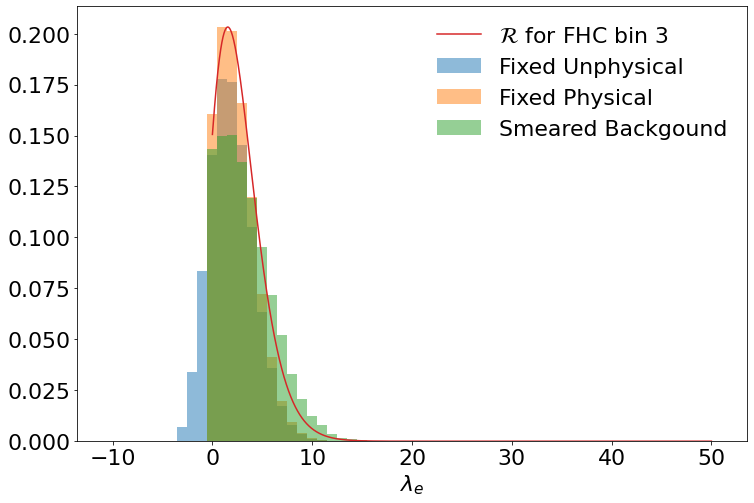

In [18]:

fig, ax = plt.subplots()
bin=3
print(fhcCount[bin],fhcBack[bin])
theta=np.linspace(0,50,5001)
fhcRArray=R(theta,fhcBack[bin],fhcCount[bin])
probArray=fhcRArray/sum(fhcRArray)
numDraws=100000
newExp=np.random.poisson(lam=fhcCount[bin], size=(numDraws))
newExpRMaxFixed=newExp-fhcBack[bin]
newExpRMax=newExp-np.random.normal(loc=fhcBack[bin],scale=3,size=newExp.shape[0])
##newExpRMax=np.delete(newExpRMax,newExpRMax<0)
#newExpRMaxFixed[newExpRMax<0]=0


count, bins, ignored = ax.hist(newExpRMaxFixed, bins=np.linspace(-10.5,40.5,52), density=True,label="Fixed Unphysical",alpha=0.5)
count, bins, ignored = ax.hist(newExpRMaxFixed, bins=np.linspace(-0.5,50.5,52), density=True,label="Fixed Physical",alpha=0.5)
count, bins, ignored = ax.hist(newExpRMax, bins=np.linspace(-0.5,50.5,52), density=True,label="Smeared Backgound",alpha=0.5)
print(np.mean(newExpRMaxFixed),np.std(newExpRMaxFixed))
fhcRArray=R(theta,fhcBack[bin],fhcCount[bin])
ax.plot(theta,probArray/(theta[1]-theta[0]),label="$\mathcal{R}$ for FHC bin "+str(bin))
ax.set_xlabel("$\lambda_e$")
ax.legend()


## Frequentist approach
The frequentist approach as laid out in "A Unified Approach to the Classical Statistical Analysis of Small Signals”, Feldman & Cousins, 1998

### Poisson with background
Reminder the Poisson distribution can tell us the probability of observing $n_e$ when our expectation is $\lambda=\lambda_e + b$
$$\textrm{Poisson}(n_e, \lambda = \lambda_e + b)=\frac{\exp^{-\lambda} \lambda^{n_e}}{n_e!}$$

The frequentist recipe for constructing the $\alpha$ confidence intervals is:
1. For each value of $\lambda_e$ we need to draw the acceptance interval which contains $\alpha$ of the probability distribuion. To determine which values of $n_e$ to include in this acceptance interval we need to use some ordering principle. The ordering principle suggested in the FC paper is to use the ratio of likelihoods for each value of $n_e$ we determine 
$$ R = \frac{P(n_e | \lambda_e)}{P(n_e \lambda_{\textrm{best}})}$$
where $\lambda_{\textrm{best}}$ is defined as $\textrm{max}(0,n_e-b)$.
2. We add in specifc integers into the acceptance interval starting with the integer with the largest $R$ and keep adding until we have greater than or equal to $\alpha$ of the probability distribution. (Actually in the code below what we do is determine all the $R$ values. Then sort them descending. Then use that order to determine the cumulative distribution function (cdf) of $P(n_e | \lambda_e)$ and take the elemnts in the front of that (sorted) array that cover at least $\alpha$ of the cdf.
3. Due to the integer nature of $n_e$ we will always have some amount of overcoverage. We also will have some pathologies where when we take vertical slices at particular $n_e$ there might be gaps in the $\lambda_e$ included in the limit. These gaps get filled in to make one contiguous belt.
4. Given a particular measurement of $n_e$ the confidence interval of $\lambda_e$ is derived by drawing a straight line vertically up at that $n_e$


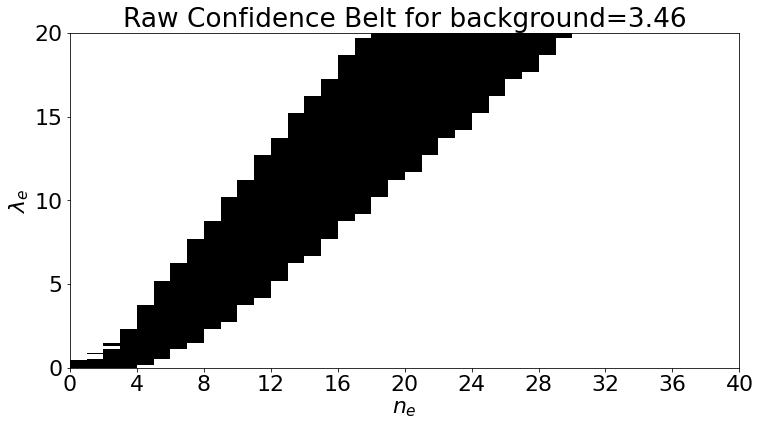

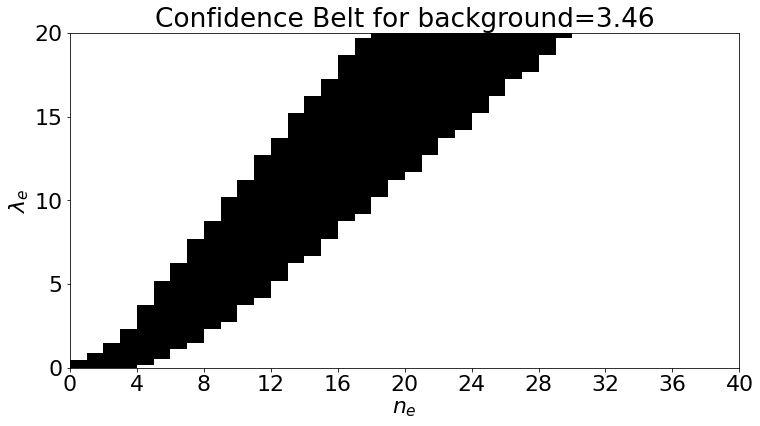

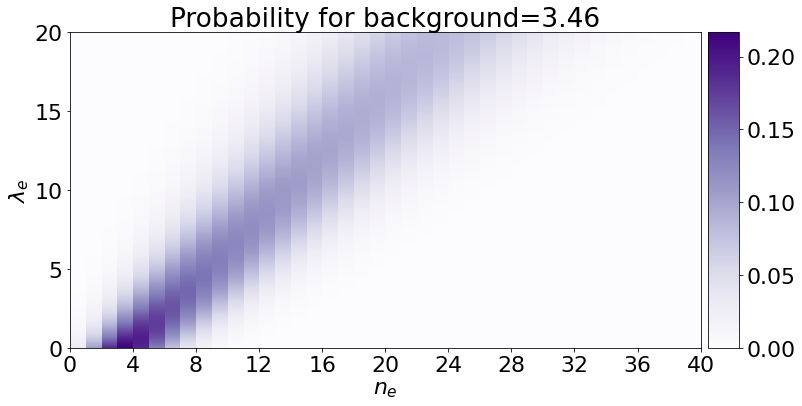

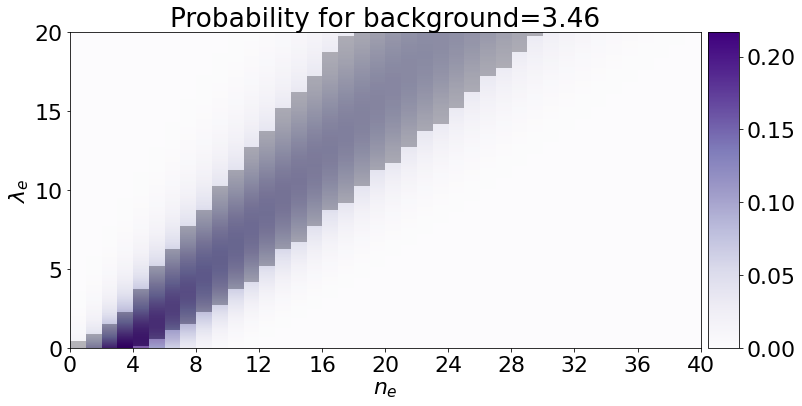

In [19]:
CL=0.6827  #What confidence level are we working towards
bin=3  #We are just using the FHC bins above to give us some default background
maxMu=20  #The maximum value of true expected number of events
numMu=2000 #
maxInt=40  #The maximum value of observed number of events
n=fhcCount[bin]  #How many events we actually saw (not used)
b=fhcBack[bin]  #Expected background
n=1  #How many events we actually saw
mat=[]  #Empty list for 2D array of P(n|lambda)
accMat=[] #Empty list for 2D array of acceptance belts
for mu in np.linspace(0.01,maxMu,numMu):
    #print(mu)
    row=[] #Empty list for row of P(n|lambda)
    rowR=[] #Empty list for row of R values
    accRow=np.zeros(maxInt)  #List of zeros for row of acceptance values
    for no in range(0,maxInt):  #Loop over all integers up to maxInt
        mubest=np.max([0,no-b])  #The best value of mu
        pnu=((mu+b)**no)*np.exp(-(mu+b))/math.factorial(no)  #P(n | mu)
        #pnubest=((mubest+b)**no)*np.exp(-(mubest+b))/math.factorial(no)   #P(n | mubest)
        thisR=((mu+b)/(mubest+b))**no*np.exp(mubest-mu)  #R=P(n|mu) / P(n | mubest)
        row.append(pnu) 
        rowR.append(thisR)
    row=np.array(row)   #Convert list to numpy array
    arrR=np.array(rowR)
    sortind=np.flip(np.argsort(arrR)) #This is a sorted index list in descending values of R
    cdf=np.cumsum(row[sortind])  #This is the cdf of P(n|mu) but ordered in descending values of R
    tLow=np.argmax(cdf>((1-CL)/2))-1  #Find the last index below (1-CL)/2 e.g. 16% for a 68% CL
    if(tLow<0):  #Edge correction 
        tLow=0
    tHigh=np.argmax(cdf>(1-((1-CL)/2))) #Find the first index above 1-(1-CL)/2 e.g. 84% for a 68% CL
    
    iLow=np.min(sortind[tLow:tHigh])  #Find which of the sorted indices between tLow and tHigh is lowest
    iHigh=np.max(sortind[tLow:tHigh]) #Find which of the sorted indices between tLow and tHigh is highest
    accRow[iLow:iHigh]=1 #Set all values of n in the acceptance interval to 1
    mat.append(row)  #Add row to 2d array
    accMat.append(accRow)   #Add row to 2d array

# Let's plot the raw confidence belt that comes out of the algorithm    
fig, ax = plt.subplots()   #Make a figure
im = ax.imshow(accMat, interpolation='none', cmap='binary',    
               origin='lower', extent=[0, maxInt, 0, maxMu],
               vmax=1, vmin=0)
ax.set_xlabel("$n_e$")
ax.set_ylabel("$\lambda_e$")
ax.set_title("Raw Confidence Belt for background={:.{}f}".format( fhcBack[bin], 2 ))
ax.xaxis.set_major_locator(MaxNLocator(nbins=10,integer=True))
    
#Now we need to fill in the gaops    
accMat=np.array(accMat) #Turn the list into array
for row in accMat.T:  #For each row of the transposed array
    indOnes=np.where(row == 1)[0] #Find the indices which are 1
    if len(indOnes):  #If the array of indices exists
        row[indOnes[0]:indOnes[-1]]=1 #Fill in the gaps with 1s

# Now let's plot the final confidence belt that comes out of the algorithm    
fig, ax = plt.subplots()
im = ax.imshow(accMat, interpolation='none', cmap='binary',
               origin='lower', extent=[0, maxInt, 0, maxMu],
               vmax=1, vmin=0)
ax.set_xlabel("$n_e$")
ax.set_ylabel("$\lambda_e$")
ax.set_title("Confidence Belt for background={:.{}f}".format( fhcBack[bin], 2 ))
#ax.grid()
ax.xaxis.set_major_locator(MaxNLocator(nbins=10,integer=True))

# Plot the probability distribution
fig, ax = plt.subplots()
im = ax.imshow(mat, interpolation='none', cmap='Purples',
               origin='lower', extent=[0, maxInt, 0, maxMu])
ax.set_xlabel("$n_e$")
ax.set_ylabel("$\lambda_e$")
ax.set_title("Probability for background={:.{}f}".format( fhcBack[bin], 2 ))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
fig.colorbar(im,cax=cax)
ax.xaxis.set_major_locator(MaxNLocator(nbins=10,integer=True))

# Plot the probability distribution overlaid with the acceptance belt
fig, ax = plt.subplots()
im = ax.imshow(mat, interpolation='none', cmap='Purples',
               origin='lower', extent=[0, maxInt, 0, maxMu])
ax.set_xlabel("$n_e$")
ax.set_ylabel("$\lambda_e$")
ax.set_title("Probability for background={:.{}f}".format( fhcBack[bin], 2 ))
ax.xaxis.set_major_locator(MaxNLocator(nbins=10,integer=True))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
fig.colorbar(im,cax=cax)
im2=ax.imshow(accMat, interpolation='none', cmap='binary',
               origin='lower', extent=[0, maxInt, 0, maxMu],
               vmax=1, vmin=0,alpha=0.25)

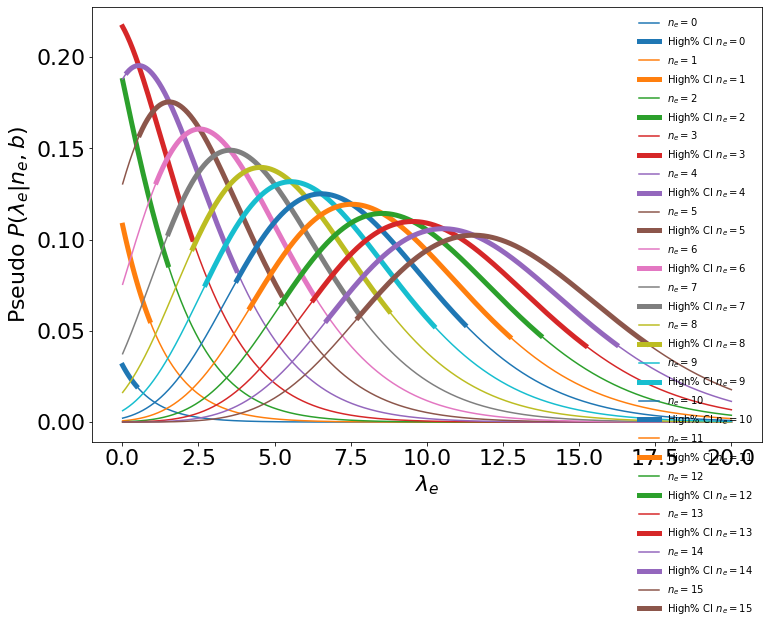

In [20]:
plotInt=16
arrMat=np.array(mat).T
clMat=np.array(accMat).T
arrMu=np.linspace(0.01,maxMu,numMu)
fig, ax = plt.subplots()
freqLowEdge=np.zeros(plotInt)
freqHighEdge=np.zeros(plotInt)
for i in range(plotInt):
    inCL=np.where(clMat[i]>0)
    freqLowEdge[i]=arrMu[inCL[0][0]]
    freqHighEdge[i]=arrMu[inCL[0][-1]]
    ax.plot(arrMu,arrMat[i],label="$n_e=$"+str(i),color="C"+str(i))
    ax.plot(arrMu[inCL[0]],arrMat[i][inCL[0]],label="High% CI $n_e=$"+str(i),color="C"+str(i),lw=5)
ax.set_xlabel("$\lambda_e$")
ax.set_ylabel("Pseudo $P(\lambda_e | n_e,b)$")
ax.legend(prop={'size': 10})
#fig, ax = plt.subplots()
#for i in range(8):
#    ax.plot(arrMu,arrMat[i]/arrMat[i][0],label="$n_e=$"+str(i))
#ax.set_xlabel("$\lambda_e$")
#ax.set_ylabel("Pseudo $P(\lambda_e | n_e,b)$")

(0.0, 20.0)

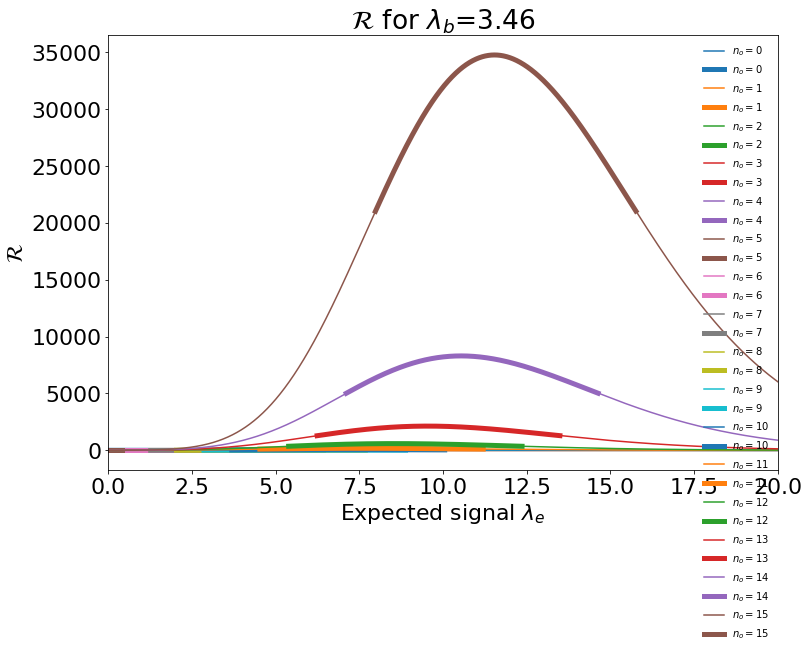

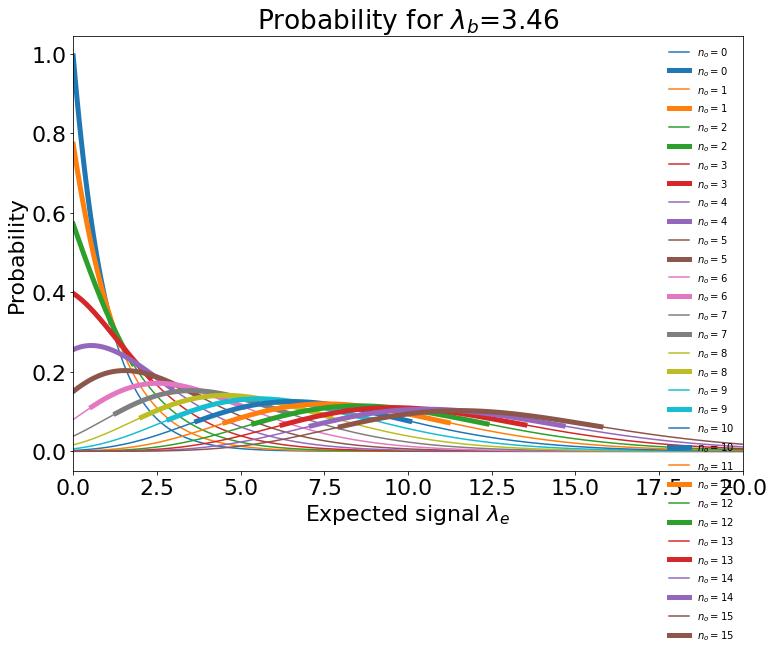

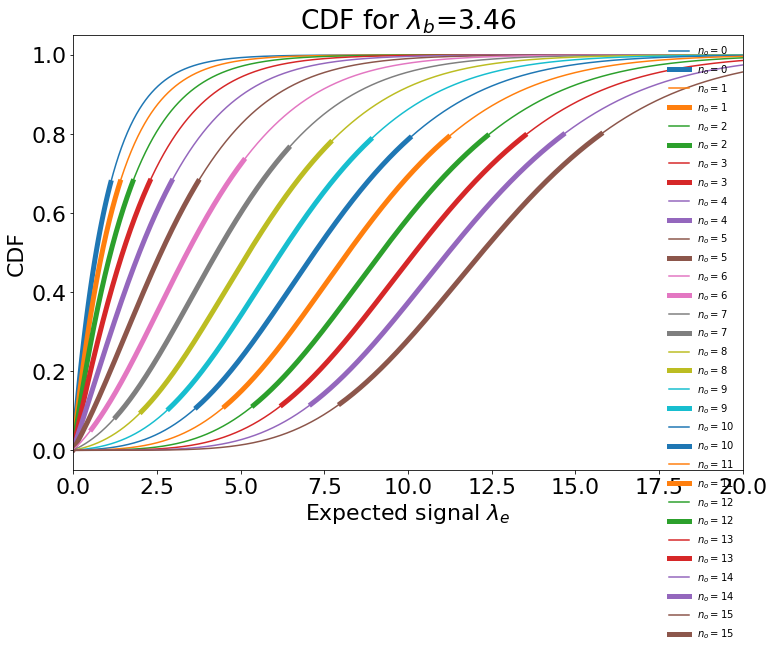

In [21]:
def R(ns,nb,no):
    return np.exp(-ns) * (1 + ns/nb)**no

CL=0.6827

fig, ax = plt.subplots()
ns=np.linspace(0,100,10000)
nb=fhcBack[bin]
lowArray=[]
highArray=[]
bayLowEdge=np.zeros(plotInt)
bayHighEdge=np.zeros(plotInt)
for no in range(plotInt):
    thisR=R(ns,nb,no)
    pdf=(thisR)/sum(thisR)
    cdf=np.cumsum(pdf)
    sortind=np.flip(np.argsort(pdf))
    sortcdf=np.cumsum(pdf[sortind])
    maxind=np.argmax(sortcdf>CL)
    tLow=np.min(sortind[0:maxind])
    tHigh=np.max(sortind[0:maxind])
    lowArray.append(tLow)
    highArray.append(tHigh)
    ax.plot(ns,thisR,label="$n_o=$"+str(no),color="C"+str(no))
    ax.plot(ns[tLow:tHigh],thisR[tLow:tHigh],label="$n_o=$"+str(no),color="C"+str(no),lw=5)
    #print(no,nb,ns[np.argmax(R(ns,nb,no))])
    bayLowEdge[no]=ns[tLow]
    bayHighEdge[no]=ns[tHigh]
ax.legend(prop={'size': 10})
ax.set_xlabel("Expected signal $\lambda_e$")
ax.set_title("$\mathcal{R}$ for $\lambda_b$="+"{:.{}f}".format(nb,2))
ax.set_ylabel(r"$\mathcal{R}$")
ax.set_xlim([0,maxMu])

fig, ax = plt.subplots()
ns=np.linspace(0,100,10000)
nb=fhcBack[bin]
for no in range(plotInt):
    thisR=R(ns,nb,no)
    pdf=(thisR)/sum(thisR)
    tLow=lowArray[no]
    tHigh=highArray[no]
    ax.plot(ns,pdf/(ns[1]-ns[0]),label="$n_o=$"+str(no),color="C"+str(no))
    ax.plot(ns[tLow:tHigh],pdf[tLow:tHigh]/(ns[1]-ns[0]),label="$n_o=$"+str(no),color="C"+str(no),lw=5)
ax.legend(prop={'size': 10})
ax.set_xlabel("Expected signal $\lambda_e$")
ax.set_title("Probability for $\lambda_b$="+"{:.{}f}".format(nb,2))
ax.set_ylabel(r"Probability")
ax.set_xlim([0,maxMu])

fig, ax = plt.subplots()
ns=np.linspace(0,100,10000)
nb=fhcBack[bin]
for no in range(plotInt):
    thisR=R(ns,nb,no)
    pdf=(thisR)/sum(thisR)
    cdf=np.cumsum(pdf)
    tLow=lowArray[no]
    tHigh=highArray[no]
    ax.plot(ns,cdf,label="$n_o=$"+str(no),color="C"+str(no))
    ax.plot(ns[tLow:tHigh],cdf[tLow:tHigh],label="$n_o=$"+str(no),color="C"+str(no),lw=5)
ax.legend(prop={'size': 10})
ax.set_xlabel("Expected signal $\lambda_e$")
ax.set_title("CDF for $\lambda_b$="+"{:.{}f}".format(nb,2))
ax.set_ylabel(r"CDF")
ax.set_xlim([0,maxMu])



Text(0.5, 1.0, 'Bayes vs Frequentist $\\lambda_b$=3.46')

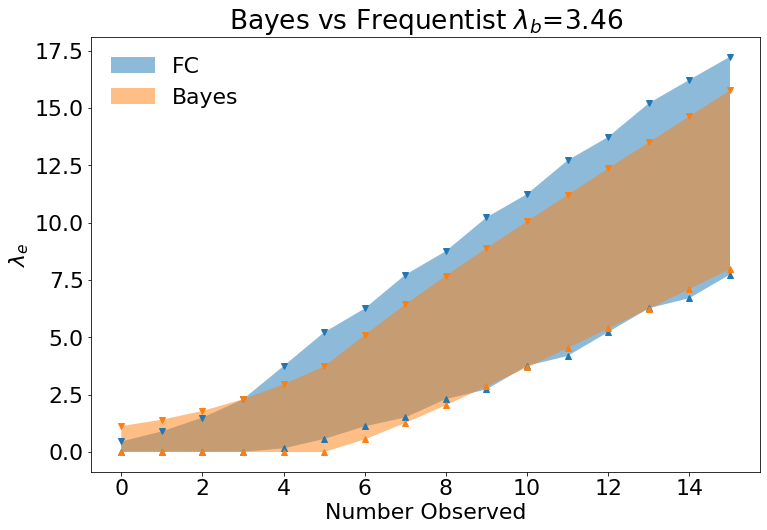

In [22]:
#Bayesian vs Frequentist
fig, ax = plt.subplots()
counts=np.arange(plotInt)
ax.fill_between(counts,freqLowEdge,freqHighEdge,alpha=0.5,label="FC")
ax.fill_between(counts,bayLowEdge,bayHighEdge,alpha=0.5,label="Bayes")
ax.plot(counts,freqLowEdge,"^",color="C"+str(0))
ax.plot(counts,freqHighEdge,"v",color="C"+str(0))
ax.plot(counts,bayLowEdge,"^",color="C"+str(1))
ax.plot(counts,bayHighEdge,"v",color="C"+str(1))
ax.legend()
ax.set_xlabel("Number Observed")
ax.set_ylabel("$\lambda_e$")
ax.set_title("Bayes vs Frequentist $\lambda_b$="+"{:.{}f}".format(nb,2))


## Determing the probability.
Earlier we determined, using the flat prior, our posterior distribution for $\lambda_e$. Now we can take this distribuiton and determine the probability. For now we can assume that the number of expected events $\nu_\mu$ is a constant (seperately in each bin). So that our probability is just a scaled version of the $\lambda_e$.

$$ P=P_{\nu_\mu \rightarrow \nu_e} = \frac{\lambda_e}{\lambda_{\mu}} $$

In [23]:
fhcProbMax=fhcVals[:,0]/fhcPred[:,1]
fhcProbLow=fhcVals[:,1]/fhcPred[:,1]
fhcProbHigh=fhcVals[:,2]/fhcPred[:,1]
fhcProb10=fhcVals[:,3]/fhcPred[:,1]
fhcProb90=fhcVals[:,4]/fhcPred[:,1]
rhcProbMax=rhcVals[:,0]/rhcPred[:,1]
rhcProbLow=rhcVals[:,1]/rhcPred[:,1]
rhcProbHigh=rhcVals[:,2]/rhcPred[:,1]
rhcProb10=rhcVals[:,3]/rhcPred[:,1]
rhcProb90=rhcVals[:,4]/rhcPred[:,1]

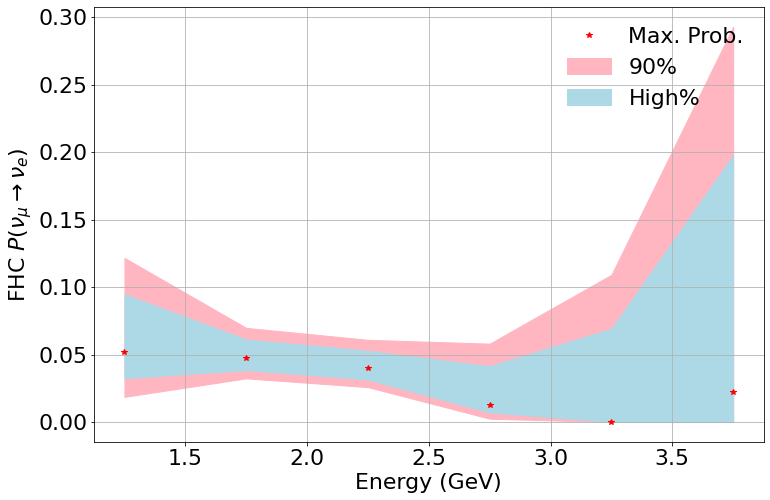

In [24]:
fig, ax = plt.subplots()
ax.fill_between(binCents,fhcProb10,fhcProb90,label="90%",color="lightpink")
ax.fill_between(binCents,fhcProbLow,fhcProbHigh,label="High%",color="lightblue")
ax.plot(binCents,fhcProbMax,"r*",label="Max. Prob.")
ax.legend()
ax.set_xlabel("Energy (GeV)")
ax.set_ylabel(r"FHC $P(\nu_\mu \rightarrow \nu_e)$")
ax.grid()

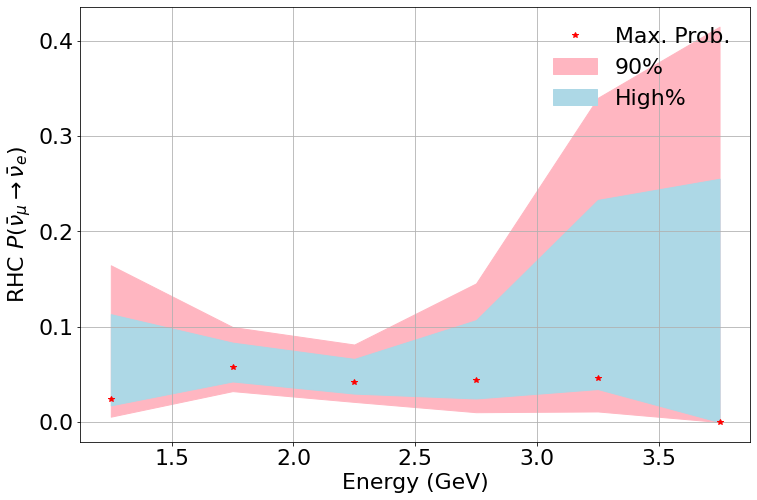

In [25]:
fig, ax = plt.subplots()
ax.fill_between(binCents,rhcProb10,rhcProb90,label="90%",color="lightpink")
ax.fill_between(binCents,rhcProbLow,rhcProbHigh,label="High%",color="lightblue")
ax.plot(binCents,rhcProbMax,"r*",label="Max. Prob.")
ax.legend()
ax.set_xlabel("Energy (GeV)")
ax.set_ylabel(r"RHC $P(\bar{\nu}_\mu \rightarrow \bar{\nu}_e)$")
ax.grid()

## Caclulate the asymmetry

Now we can calculate the asymmetry

$$\mathcal{A} = \frac{P - \bar{P}}{P+ \bar{P}}$$

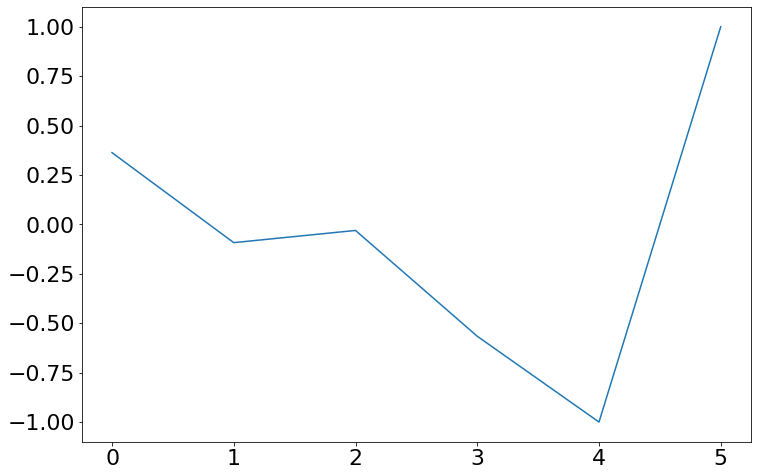

In [26]:
fig, ax = plt.subplots()
A=(fhcProbMax-rhcProbMax)/(fhcProbMax+rhcProbMax)

ax.plot(np.arange(6),A,label="Max. Prob.")

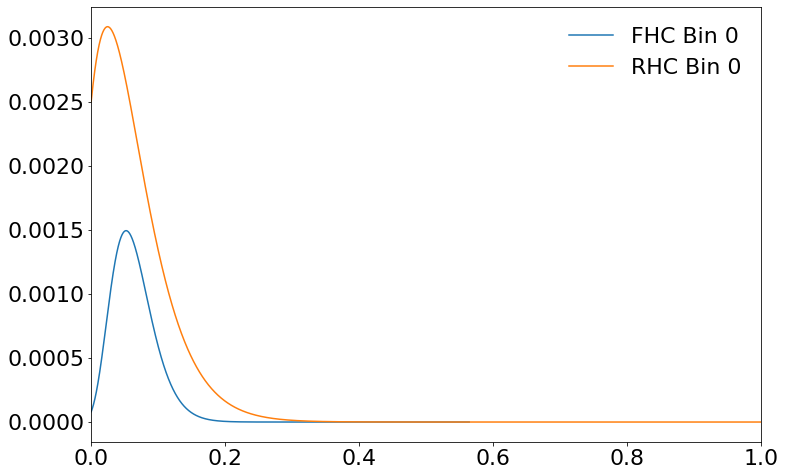

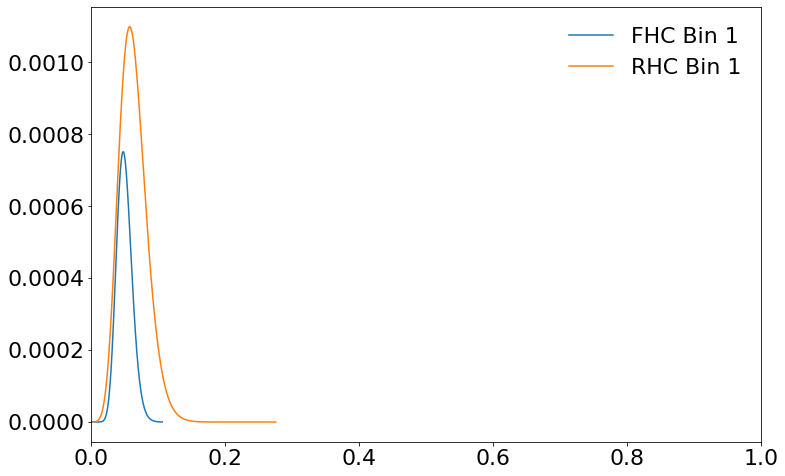

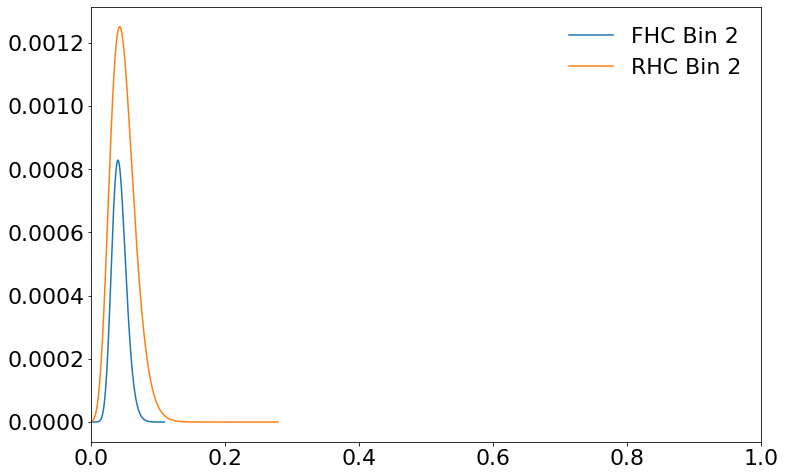

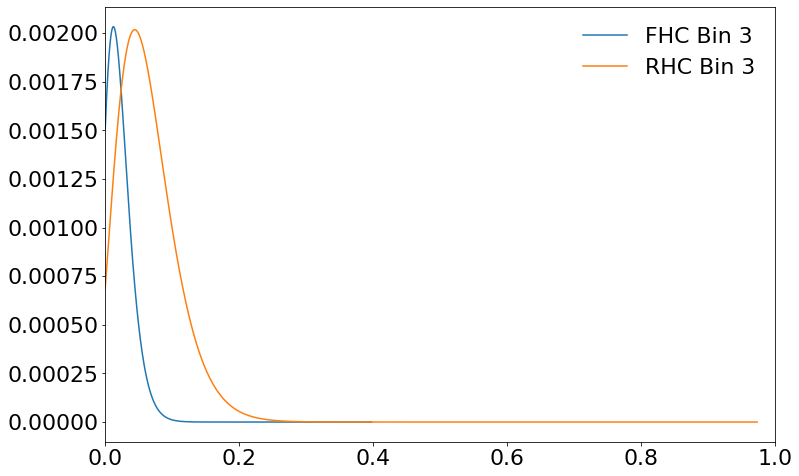

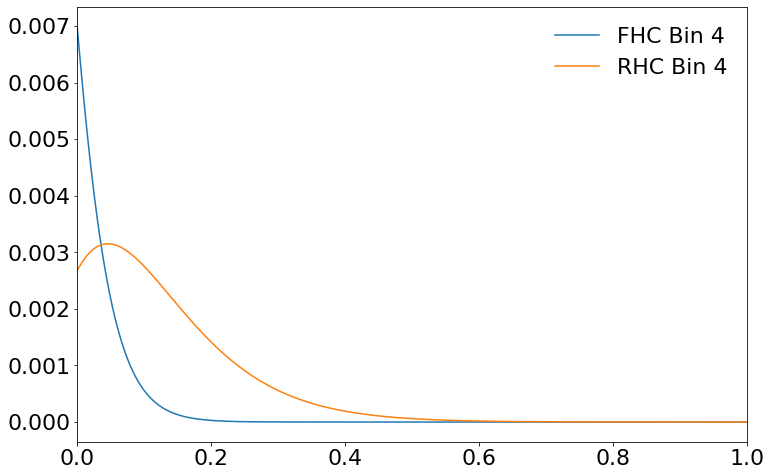

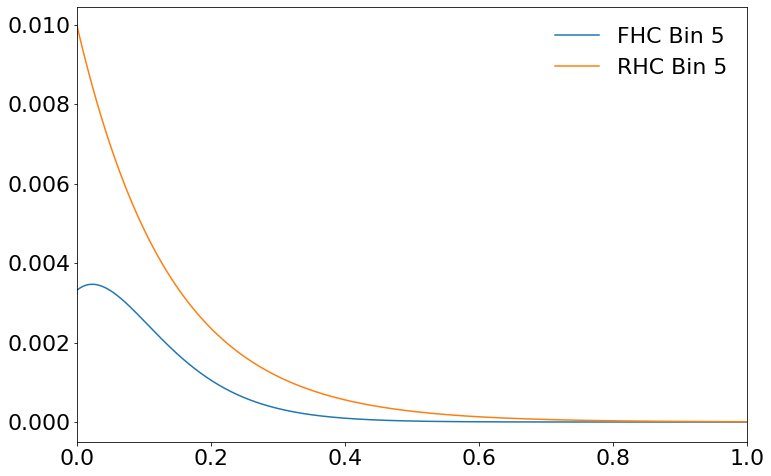

In [27]:
fhcPostArray=np.array(fhcPostArray)
fhcTheta=np.vstack((theta,theta,theta,theta,theta,theta))
fhcTheta=fhcTheta.T/fhcPred[:,1]
rhcPostArray=np.array(rhcPostArray)
rhcTheta=np.vstack((theta,theta,theta,theta,theta,theta))
rhcTheta=rhcTheta.T/rhcPred[:,1]
for i in range(6):
    fig, ax = plt.subplots()
    ax.plot(fhcTheta[:,i],fhcPostArray[i],label="FHC Bin "+str(i))
    ax.plot(rhcTheta[:,i],rhcPostArray[i],label="RHC Bin "+str(i))
    ax.set_xlim([0,1])
    ax.legend()

In [28]:
fpArray=[]
rpArray=[]
aArray=[]
fgArray=[]
rgArray=[]
agArray=[]
for j in range(6):
    fhcBin1=np.random.choice(np.arange(len(fhcPostArray[j])), p=fhcPostArray[j],size=100000)
    rhcBin1=np.random.choice(np.arange(len(rhcPostArray[j])), p=rhcPostArray[j],size=100000)
    fhcProbs=np.array([fhcTheta[i,0] for i in fhcBin1])
    rhcProbs=np.array([rhcTheta[i,0] for i in rhcBin1])
    atest=(fhcProbs-rhcProbs)/(fhcProbs+rhcProbs)
    aArray.append(atest)
    fpArray.append(fhcProbs)
    rpArray.append(rhcProbs)
    fit_shape, fit_loc, fit_beta=scipy.stats.gamma.fit(fhcProbs[~np.isnan(fhcProbs)])
    fgArray.append((fit_shape, fit_loc, fit_beta))
    fit_alpha, fit_loc, fit_beta=scipy.stats.gamma.fit(rhcProbs[~np.isnan(rhcProbs)])
    rgArray.append((fit_alpha, fit_loc, fit_beta))
    a,b,loc,scale=scipy.stats.betaprime.fit(atest[~np.isnan(atest)])
    agArray.append((a,b,loc,scale))



/Users/rjn/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:781: RuntimeWarning: divide by zero encountered in true_divide
  a/(b-1.0),
/Users/rjn/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:785: RuntimeWarning: divide by zero encountered in true_divide
  a*(a+1.0)/((b-2.0)*(b-1.0)),
/Users/rjn/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
<ipython-input-28-623946326466>:12: RuntimeWarning: invalid value encountered in true_divide
  atest=(fhcProbs-rhcProbs)/(fhcProbs+rhcProbs)


[(6.5074652019899855, -0.017355154406372017, 0.012424721660332299), (29.56413661960692, -0.06588752222456887, 0.011214091349914463), (22.683506812349606, -0.0463484199504676, 0.011635489997489675), (1.71928301575777, -0.0008653587428649055, 0.020568753533849984), (0.9757895786374409, -2.4367298752014142e-32, 0.015180522684961478), (1.2986496754474306, -8.650265587329038e-05, 0.01674370821916201)]


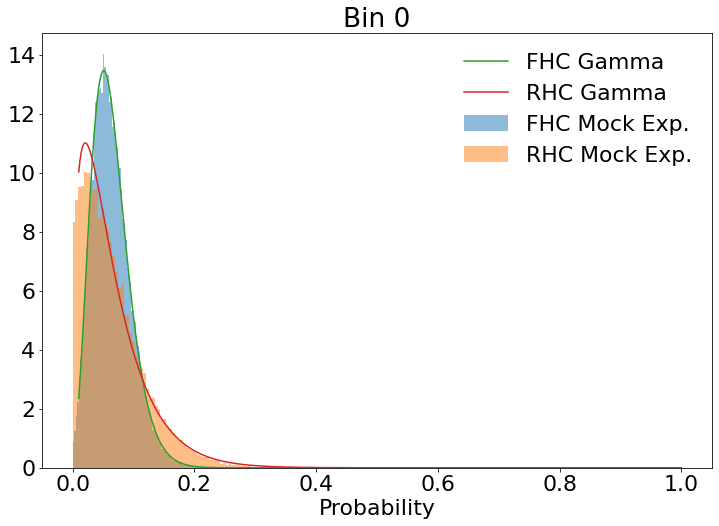

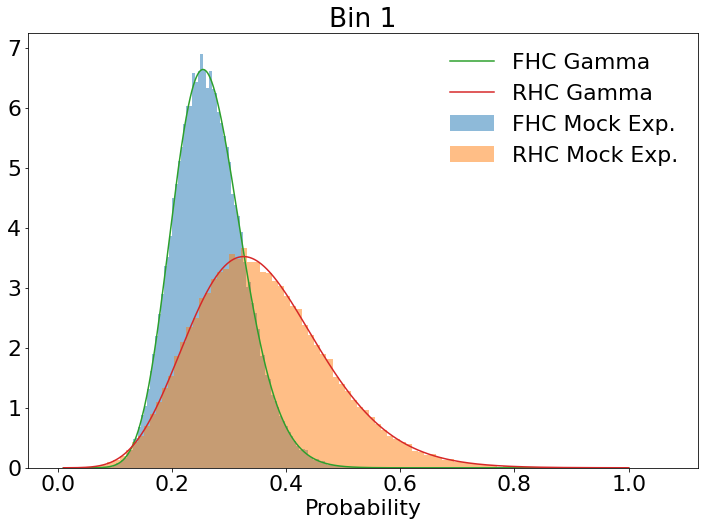

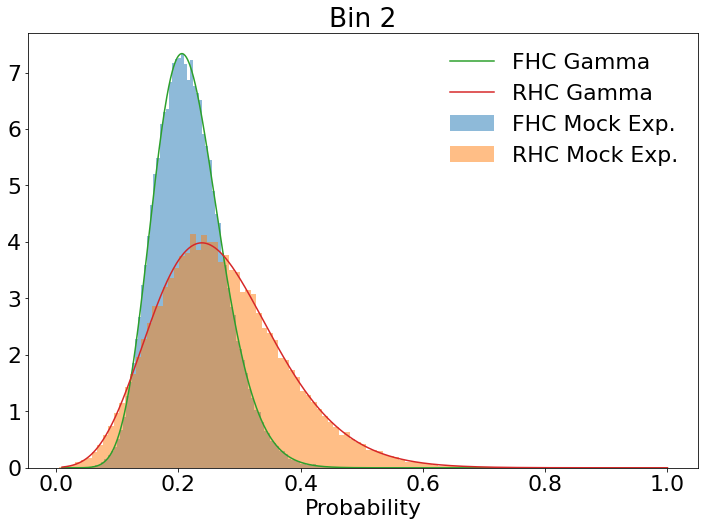

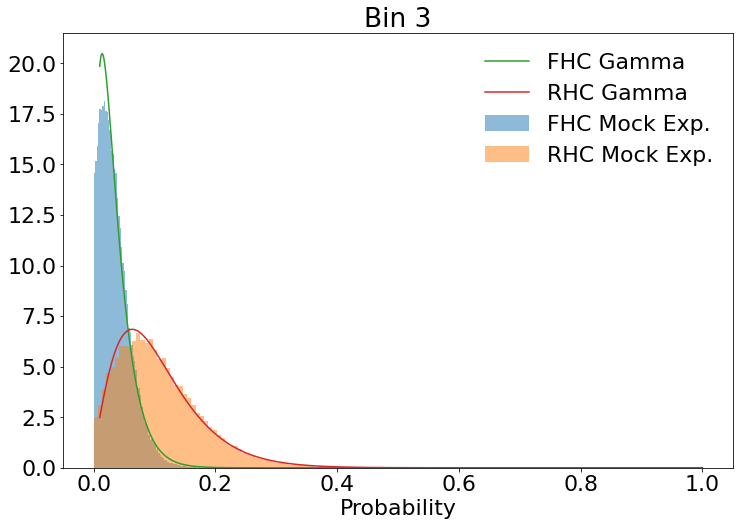

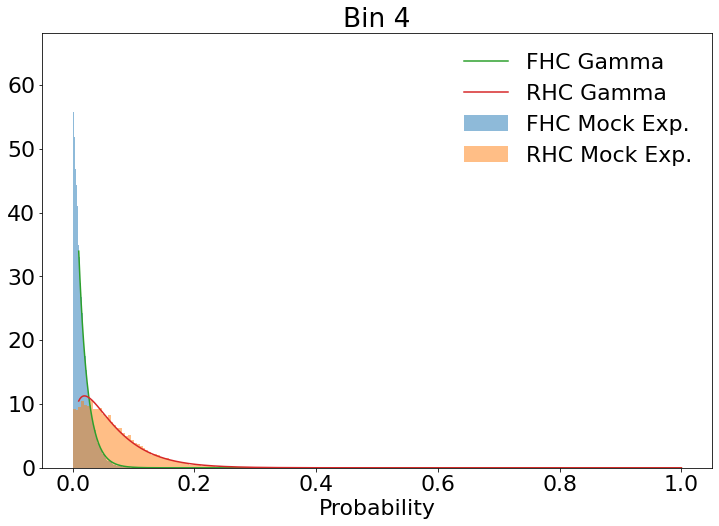

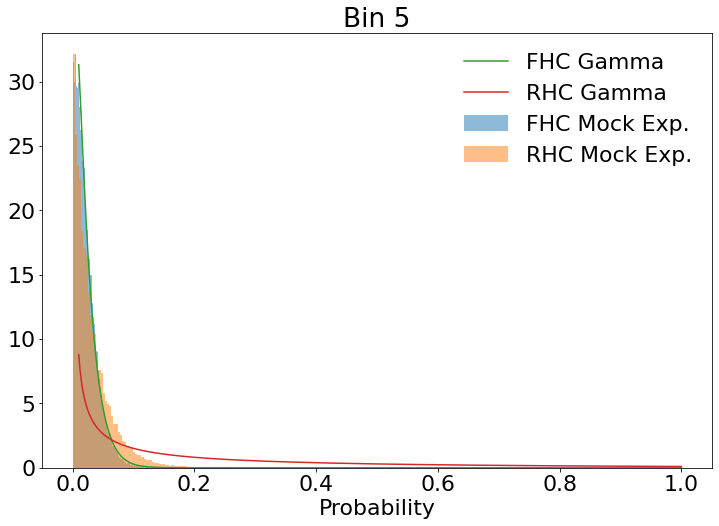

In [41]:
print(fgArray)
for i in range(6):
    fig, ax = plt.subplots()
    count, bins, ignored = ax.hist(fpArray[i], 100, density=True,alpha=0.5,label="FHC Mock Exp.")
    count, bins, ignored = ax.hist(rpArray[i], 100,density=True,alpha=0.5,label="RHC Mock Exp.")
    ax.set_xlabel("Probability")
    x=np.linspace(0.01,1,1000)
    y = scipy.stats.gamma.pdf(x, fgArray[i][0], fgArray[i][1], fgArray[i][2])
    ax.plot(x,y,label="FHC Gamma")
    y2 = scipy.stats.gamma.pdf(x, rgArray[i][0], rgArray[i][1], rgArray[i][2])
    ax.plot(x,y2,label="RHC Gamma")
    ax.set_title("Bin "+str(i))
    ax.legend()


# Pseudo FC for $A_{CP}$

$$\mathcal{A} = \frac{P - \bar{P}}{P+ \bar{P}}$$

$$P(\lambda_e) \propto \lambda_e$$

$$\mathcal{A}(P+ \bar{P}) = P - \bar{P}$$
$$\bar{P}(1+\mathcal{A} )= P(1-\mathcal{A})$$
$$\bar{P}= P\frac{1-\mathcal{A}}{1+\mathcal{A}}$$



In [52]:
bin=3
print(fhcBack[bin],fhcCount[bin],fhcPred[bin][1])
print(rhcBack[bin],rhcCount[bin],rhcPred[bin][1])

3.46153846153846 5 125.71428571428578
1.7343750000000018 4 51.351351351351326


In [53]:
fhcInts=np.arange(80)
rhcInts=np.arange(40)

FHC b=3.46


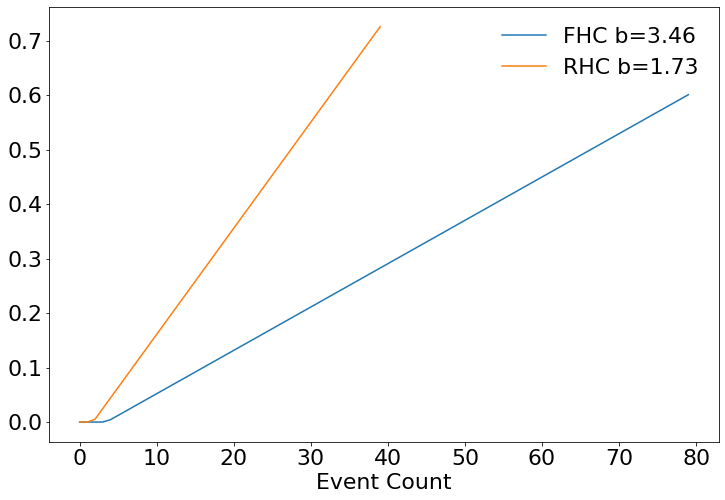

In [54]:
fhcProbs=(fhcInts-fhcBack[bin])/fhcPred[bin][1]
fhcProbs[fhcProbs<0]=0
rhcProbs=(rhcInts-rhcBack[bin])/rhcPred[bin][1]
rhcProbs[rhcProbs<0]=0
fig, ax = plt.subplots()
fhcLabel="FHC b={:.{}f}".format(fhcBack[bin],2)
print(fhcLabel)
ax.plot(fhcInts,fhcProbs,label=fhcLabel)
ax.plot(rhcInts,rhcProbs,label="RHC b={:.{}f}".format(rhcBack[bin],2))
ax.set_xlabel("Event Count")
ax.legend()

In [55]:
fhcP2d=np.tile(fhcProbs,(len(rhcProbs),1))
rhcP2d=np.tile(rhcProbs,(len(fhcProbs),1))
print(fhcP2d.shape)
print(rhcP2d.shape)
rhcP2d=rhcP2d.T
acp2d=(fhcP2d-rhcP2d)/(fhcP2d+rhcP2d)



(40, 80)
(80, 40)


<ipython-input-55-324045d01503>:6: RuntimeWarning: invalid value encountered in true_divide
  acp2d=(fhcP2d-rhcP2d)/(fhcP2d+rhcP2d)


Text(0, 0.5, 'No. $\\bar{\\nu}_e$')

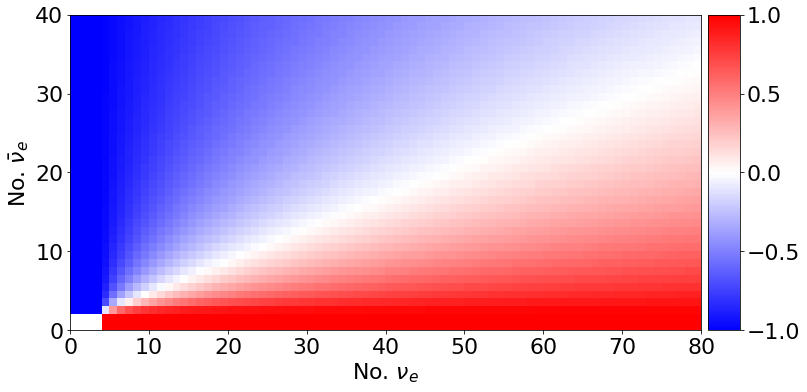

In [56]:
fig, ax = plt.subplots()
im = ax.imshow(acp2d, interpolation='none', cmap='bwr',
               origin='lower', extent=[0, len(fhcInts), 0, len(rhcInts)])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
fig.colorbar(im,cax=cax)
ax.set_xlabel(r"No. $\nu_e$")
ax.set_ylabel(r"No. $\bar{\nu}_e$")

<ipython-input-99-bd4994abf51c>:6: RuntimeWarning: divide by zero encountered in true_divide
  p2_2d=p1_2d.T*(1-acp2d)/(1+acp2d)
<ipython-input-99-bd4994abf51c>:6: RuntimeWarning: invalid value encountered in true_divide
  p2_2d=p1_2d.T*(1-acp2d)/(1+acp2d)


Text(0, 0.5, '$P(\\nu_{\\mu} \\rightarrow \\nu_e )$')

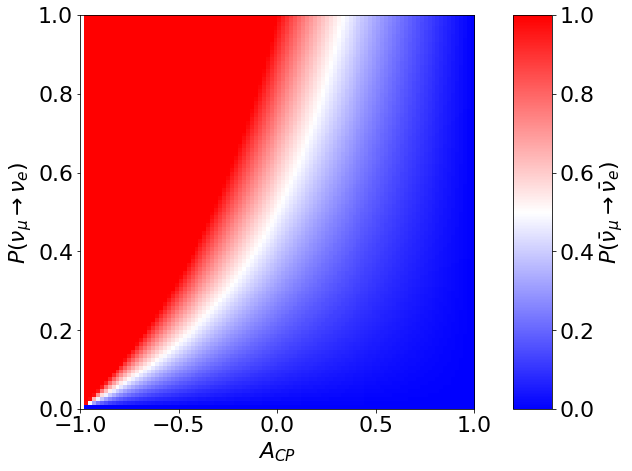

In [99]:
acpArray=np.linspace(-1,1,100)
p1Array=np.linspace(0,1,100)
acp2d=np.tile(acpArray,(len(p1Array),1))
p1_2d=np.tile(p1Array,(len(acpArray),1))

p2_2d=p1_2d.T*(1-acp2d)/(1+acp2d)


ig, ax = plt.subplots()
im = ax.imshow(p2_2d, interpolation='none', cmap='bwr',
               origin='lower',extent=[-1,1,0,1], aspect=2)
im.set_clim(0,1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=-2.2)
cbar=fig.colorbar(im,cax=cax)
cbar.set_label(r"$P(\bar{\nu}_{\mu} \rightarrow \bar{\nu}_e )$")
ax.set_xlabel("$A_{CP}$")
ax.set_ylabel(r"$P(\nu_{\mu} \rightarrow \nu_e )$")


Text(0, 0.5, 'Num. $\\nu_e$')

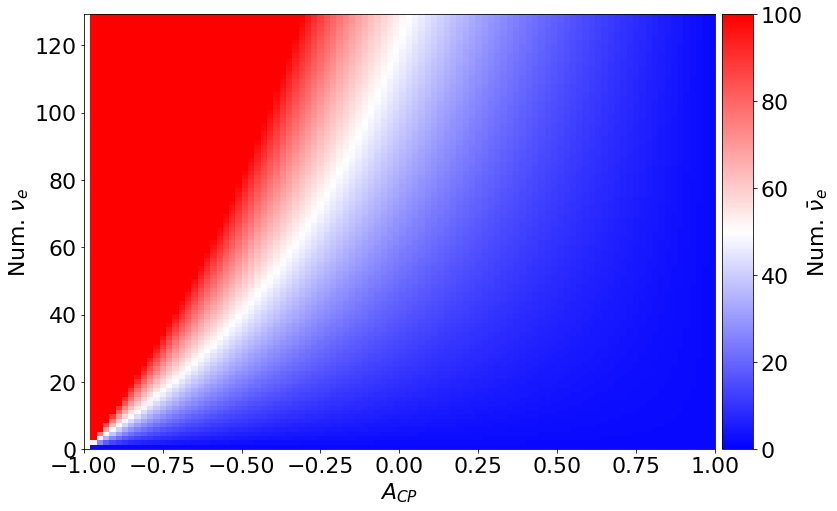

In [143]:
n1Array=fhcPred[bin][1]*p1Array+fhcBack[bin]
n2_2d=rhcPred[bin][1]*p2_2d+rhcBack[bin]
fig, ax = plt.subplots()
im = ax.imshow(n2_2d, interpolation='none', cmap='bwr',
               origin='lower',extent=[-1,1,0,n1Array[-1]], aspect='auto')
im.set_clim(0,100)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar=fig.colorbar(im,cax=cax)
cbar.set_label(r"Num. $\bar{\nu}_e$")
ax.set_xlabel("$A_{CP}$")
ax.set_ylabel(r"Num. $\nu_e$")



In [144]:
lFHC=np.linspace(1,40,40)
lRHC=np.linspace(1,20,20)

nFHC = np.random.poisson(lFHC,(10000,lFHC.shape[0]) )
nRHC = np.random.poisson(lRHC,(10000,lRHC.shape[0]) )

probFHC=nFHC/fhcPred[bin][1]
probRHC=nRHC/rhcPred[bin][1]



0 7 2
0 2.3846153846153832 1.2187500000000036
0 [ 1.20353982 88.57142857] [ 1.25179856 31.98198198]
0 0.36167298101414974
1 28 13
1 5.499999999999993 2.5703125
1 [  1.7699115  471.42857143] [  1.74100719 181.53153153]
1 -0.09247465328916599
2 23 10
2 4.730769230769226 2.3828125000000018
2 [  2.24778761 457.14285714] [  2.23741007 179.27927928]
2 -0.0306104696413363


<ipython-input-286-d23468a47ea3>:17: RuntimeWarning: invalid value encountered in true_divide
  acp=(probFHC-probRHC)/(probFHC+probRHC)


3 5 4
3 3.46153846153846 1.7343750000000018
3 [  2.76106195 125.71428571] [ 2.74820144 51.35135135]
3 -0.5657120699595403
4 1 2
4 2.3461538461538467 1.296875
4 [ 3.2920354  34.28571429] [ 3.24460432 15.31531532]
4 -1.0
5 2 0
5 1.6153846153846132 0.9765625
5 [ 3.75221239 17.14285714] [3.74820144 7.20720721]
5 1.0


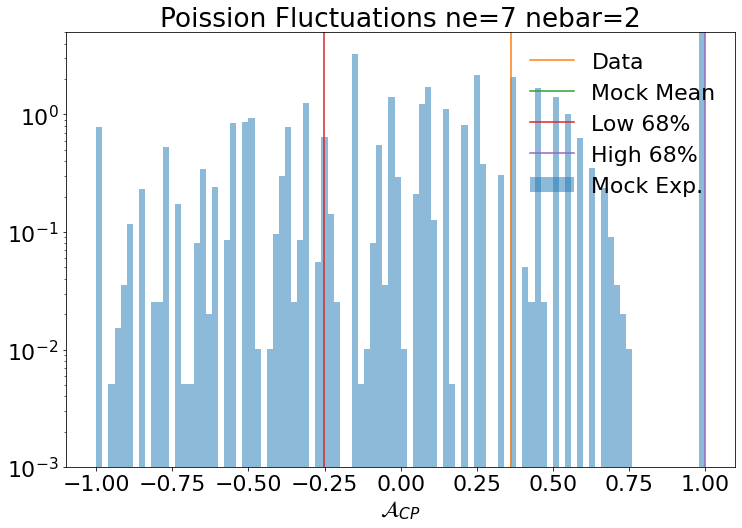

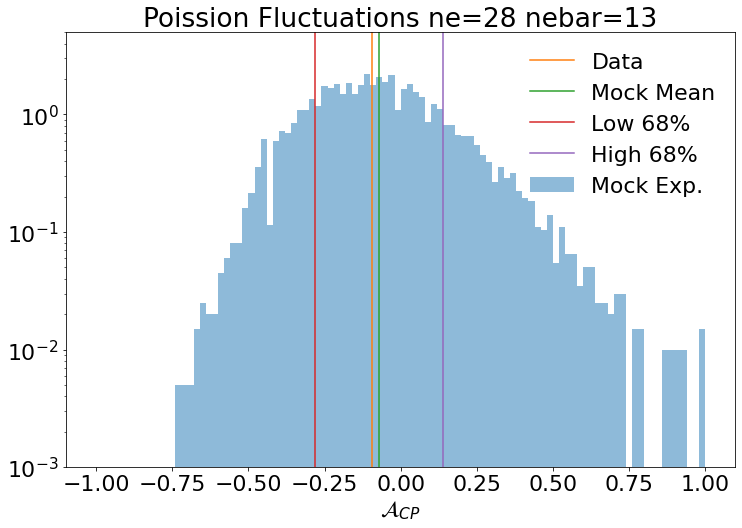

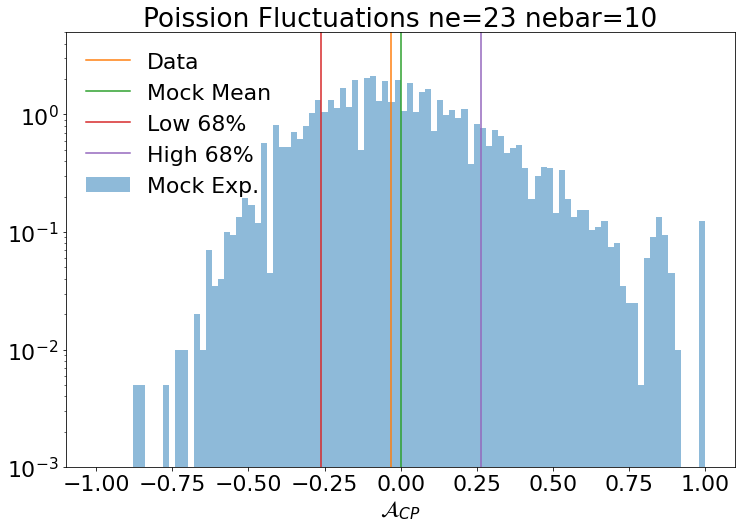

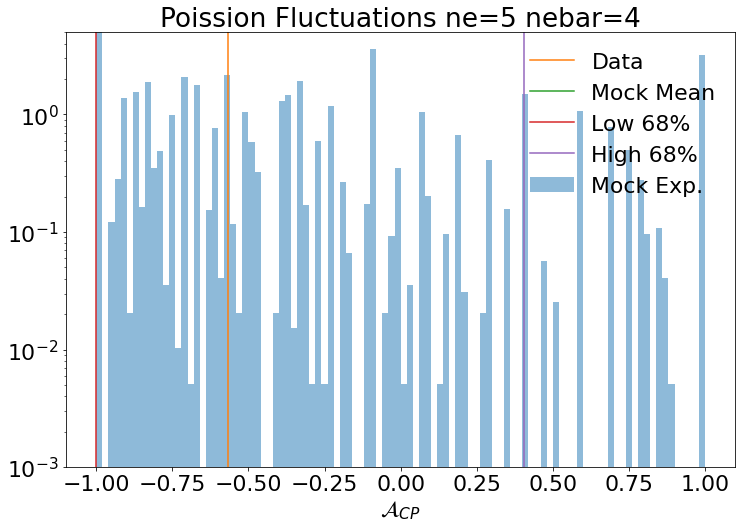

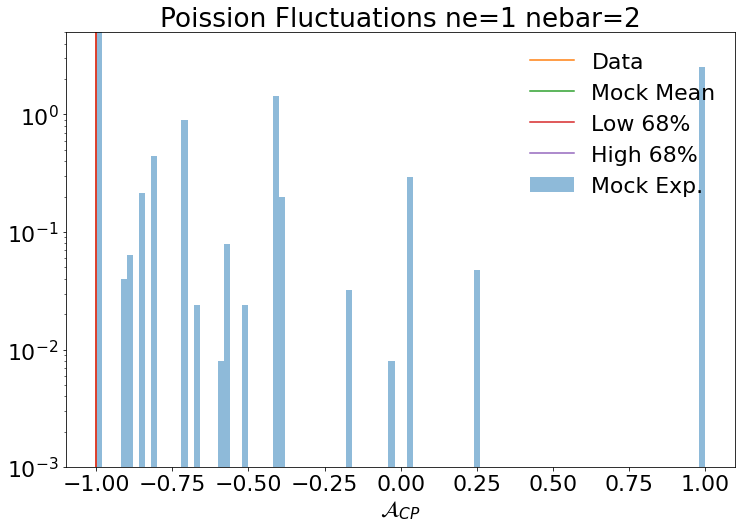

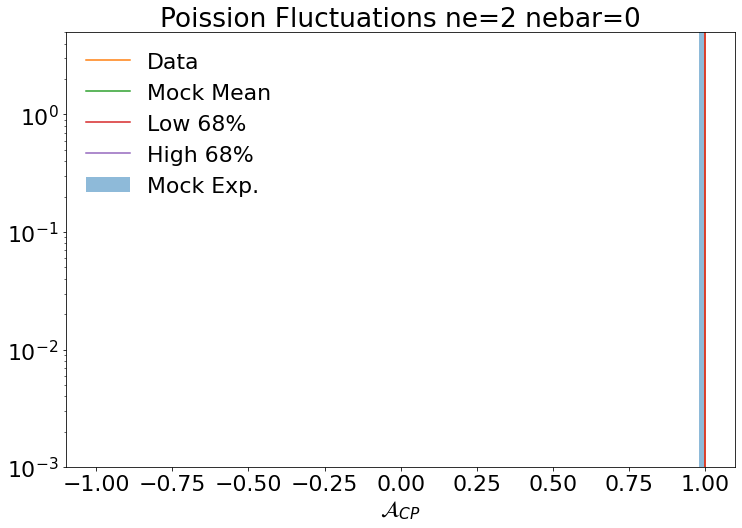

In [286]:
predSigma=0
backSigma=0
numExp=10000

for bin in range(6):
    print(bin,fhcCount[bin],rhcCount[bin])
    print(bin,fhcBack[bin],rhcBack[bin])
    print(bin,fhcPred[bin],rhcPred[bin])
    nFHC=np.random.poisson(fhcCount[bin],numExp)
    nRHC=np.random.poisson(rhcCount[bin],numExp)
    nFHC=nFHC-fhcBack[bin]-np.random.normal(0,backSigma,numExp)
    nRHC=nRHC-rhcBack[bin]-np.random.normal(0,backSigma,numExp)
    nFHC[nFHC<0]=0
    nRHC[nRHC<0]=0
    probFHC=nFHC/(fhcPred[bin][1]+np.random.normal(0,predSigma,numExp))
    probRHC=nRHC/(rhcPred[bin][1]+np.random.normal(0,predSigma,numExp))
    acp=(probFHC-probRHC)/(probFHC+probRHC)
    
    
    sortacp=np.sort(acp)
    iLow=np.round(len(sortacp)*(1-0.6828)/2)
    iHigh=np.round(len(sortacp)*(1+0.6828)/2)
    valLow=sortacp[int(iLow)]
    valHigh=sortacp[int(iHigh)]
    
    fig, ax = plt.subplots()
    pFHC=(fhcCount[bin]-fhcBack[bin])/fhcPred[bin][1]
    pRHC=(rhcCount[bin]-rhcBack[bin])/rhcPred[bin][1]
    if(pFHC<0):
        pFHC=0
    if(pRHC<0):
        pRHC=0
    measAcp=(pFHC-pRHC)/(pFHC+pRHC)
    meanAcp=np.mean(acp)
    print(bin,measAcp)
    count, bins, ignored = ax.hist(acp , bins=np.linspace(-1,1,101),density=True,label="Mock Exp.",alpha=0.5)
    ax.plot([measAcp,measAcp],[1e-3,5],label="Data")
    ax.plot([meanAcp,meanAcp],[1e-3,5],label="Mock Mean")
    ax.plot([valLow,valLow],[1e-3,5],label="Low 68%")
    ax.plot([valHigh,valHigh],[1e-3,5],label="High 68%")
    ax.set_ylim([1e-3,5])
    ax.set_yscale("log")
    ax.set_xlabel(r"$\mathcal{A}_{CP}$")
    ax.legend()
    ax.set_title("Poission Fluctuations ne="+"{:.{}f}".format(fhcCount[bin],0)+" nebar="+"{:.{}f}".format(rhcCount[bin],0))

In [289]:
bin=1
numThrows=100000
testAcp=-0.3
leArray=np.linspace(0.1,80,100)
p1Array=(leArray-fhcBack[bin])/fhcPred[bin][1]
p1Array[p1Array<0]=0
p2Array=p1Array*(1-testAcp)/(1+testAcp)
lebarArray=rhcPred[bin][1]*p2Array+rhcBack[bin]

nFHC = np.random.poisson(leArray,(numThrows,leArray.shape[0]) )
nRHC = np.random.poisson(lebarArray,(numThrows,lebarArray.shape[0]) )

pFHC = (nFHC-fhcBack[bin])/fhcPred[bin][1]
pRHC = (nRHC-rhcBack[bin])/rhcPred[bin][1]
acpMeas=(pFHC-pRHC)/(pFHC+pRHC)

pFHCRyan=pFHC
pFHCRyan[pFHCRyan<0]=0
pRHCRyan=pRHC
pRHCRyan[pRHCRyan<0]=0
acpRyan=(pFHCRyan-pRHCRyan)/(pFHCRyan+pRHCRyan)


<ipython-input-289-a8226be868fd>:21: RuntimeWarning: invalid value encountered in true_divide
  acpRyan=(pFHCRyan-pRHCRyan)/(pFHCRyan+pRHCRyan)


Text(0, 0.5, '$A_{CP}$')

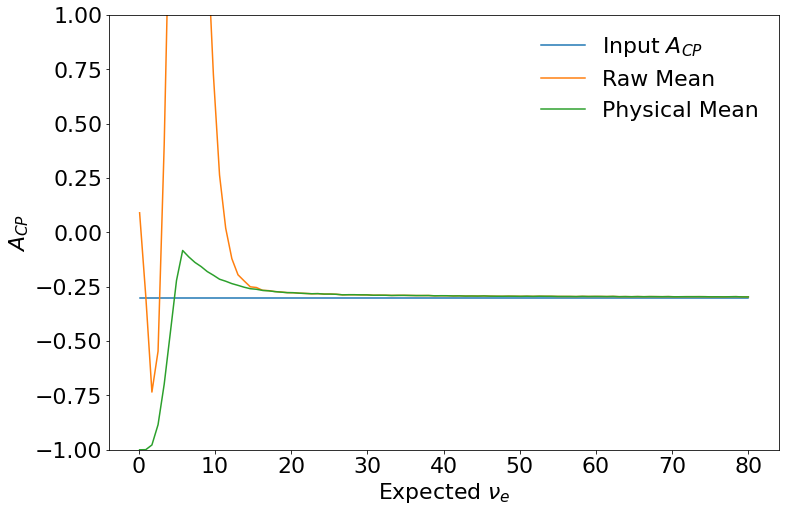

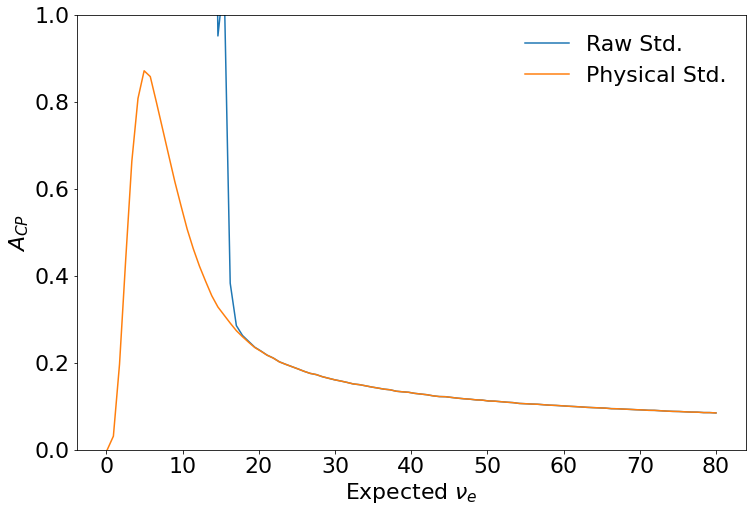

In [290]:
fig, ax = plt.subplots()
ax.plot([leArray[0],leArray[-1]],[testAcp,testAcp],label="Input $A_{CP}$")
ax.plot(leArray,np.mean(acpMeas,axis=0),label="Raw Mean")
#ax.fill_between(leArray,np.mean(acpMeas,axis=0)-np.std(acpMeas,axis=0),np.mean(acpMeas,axis=0)+np.std(acpMeas,axis=0))
ax.plot(leArray,np.nanmean(acpRyan,axis=0),label="Physical Mean")
ax.set_ylim([-1,1])
ax.legend()
ax.set_xlabel(r"Expected $\nu_e$")
ax.set_ylabel(r"$A_{CP}$")


fig, ax = plt.subplots()
#ax.plot([leArray[0],leArray[-1]],[testAcp,testAcp],label="Input $A_{CP}$")
ax.plot(leArray,np.std(acpMeas,axis=0),label="Raw Std.")
#ax.fill_between(leArray,np.mean(acpMeas,axis=0)-np.std(acpMeas,axis=0),np.mean(acpMeas,axis=0)+np.std(acpMeas,axis=0))
ax.plot(leArray,np.nanstd(acpRyan,axis=0),label="Physical Std.")
ax.set_ylim([0,1])
ax.legend()
ax.set_xlabel(r"Expected $\nu_e$")
ax.set_ylabel(r"$A_{CP}$")



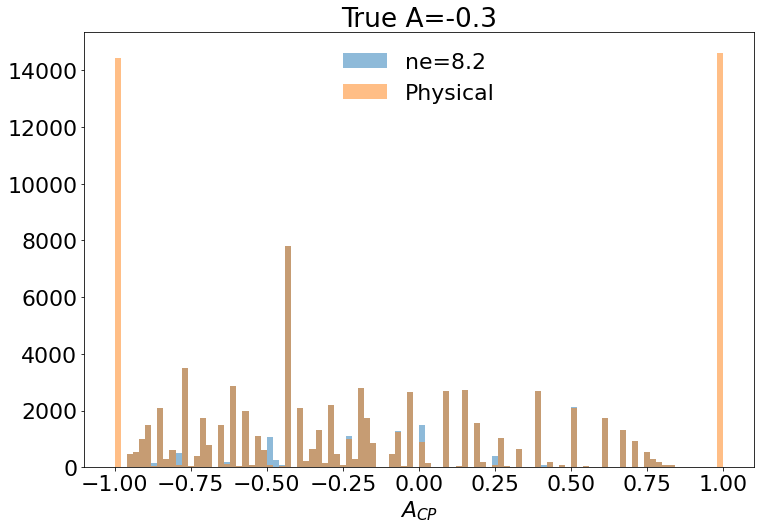

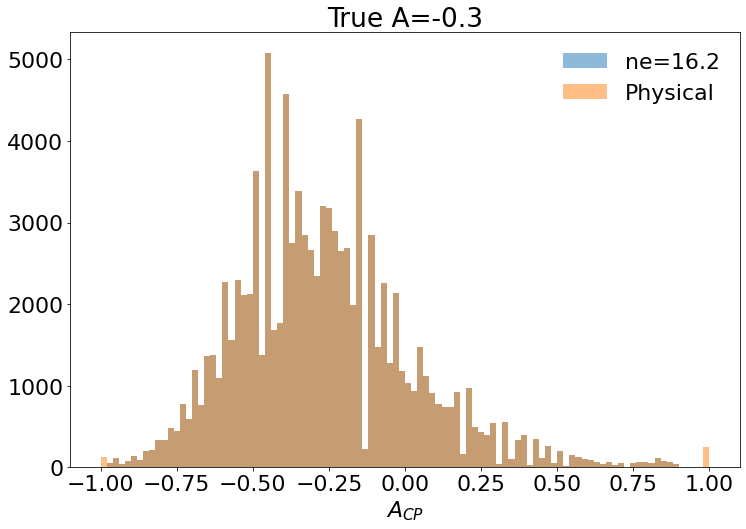

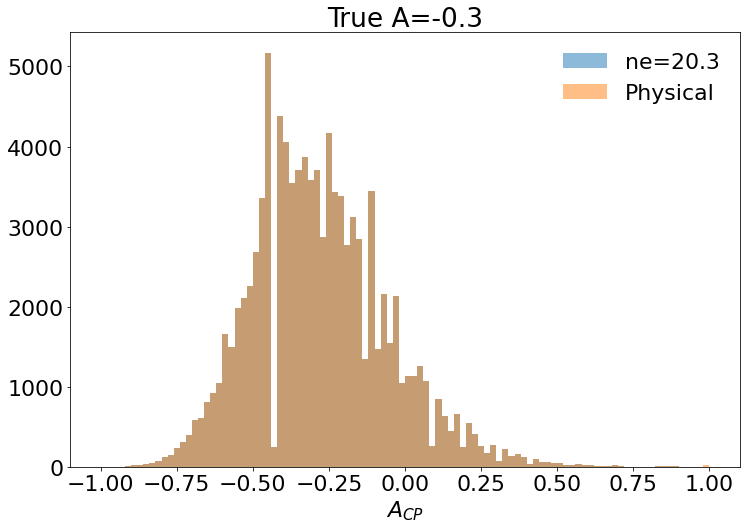

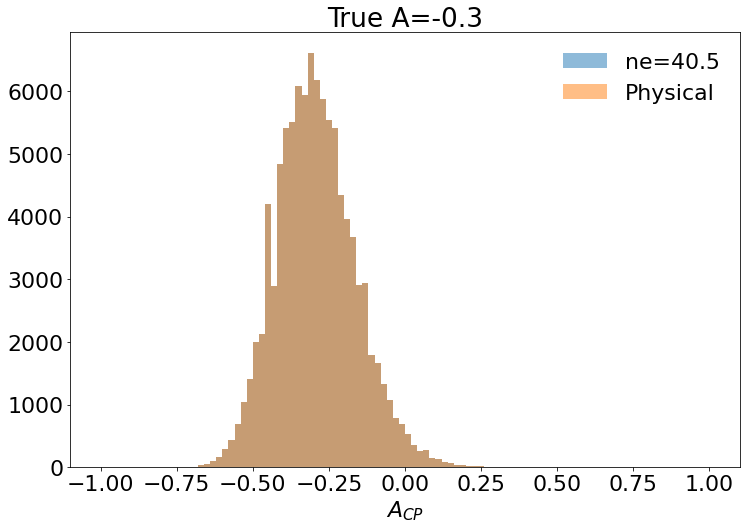

In [291]:
for i in [10,20,25,50]:
    fig, ax = plt.subplots()
    #im = ax.imshow(acpMeas, interpolation='none', cmap='bwr',origin='lower', aspect='auto')
    count, bins, ignored = ax.hist(acpMeas[:,i] , bins=np.linspace(-1,1,101),density=False,label="ne={:.{}f}".format(leArray[i],1),alpha=0.5)
    count, bins, ignored = ax.hist(acpRyan[:,i] , bins=np.linspace(-1,1,101),density=False,label="Physical",alpha=0.5)
    title="True A="+str(testAcp)
    ax.set_title(title)
    ax.set_xlabel('$A_{CP}$')
    ax.legend()